In [1]:
import os  
import sys  
import pandas as pd
import openpyxl
 
# get the current working directory  
cwd = os.getcwd()  
print("Current working directory:", cwd)  
  
# change the current working directory to one level up  
os.chdir("..")  
  
# get the new current working directory  
new_cwd = os.getcwd()  
print("New current working directory:", new_cwd)  

Current working directory: /home/runner/work/myfinance/myfinance/NT
New current working directory: /home/runner/work/myfinance/myfinance


In [2]:
sys.path.append(os.path.abspath("data"))
from relative import *
from AT_funs import *
# add the 'data' folder to the system path  


In [3]:

filename = 'data/CPR.MI.xlsx'
df = read_xlsx(filename)
ticker = filename.replace('xlsx', '')
# df
filename_bm = 'data/FTSEMIB.MI.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

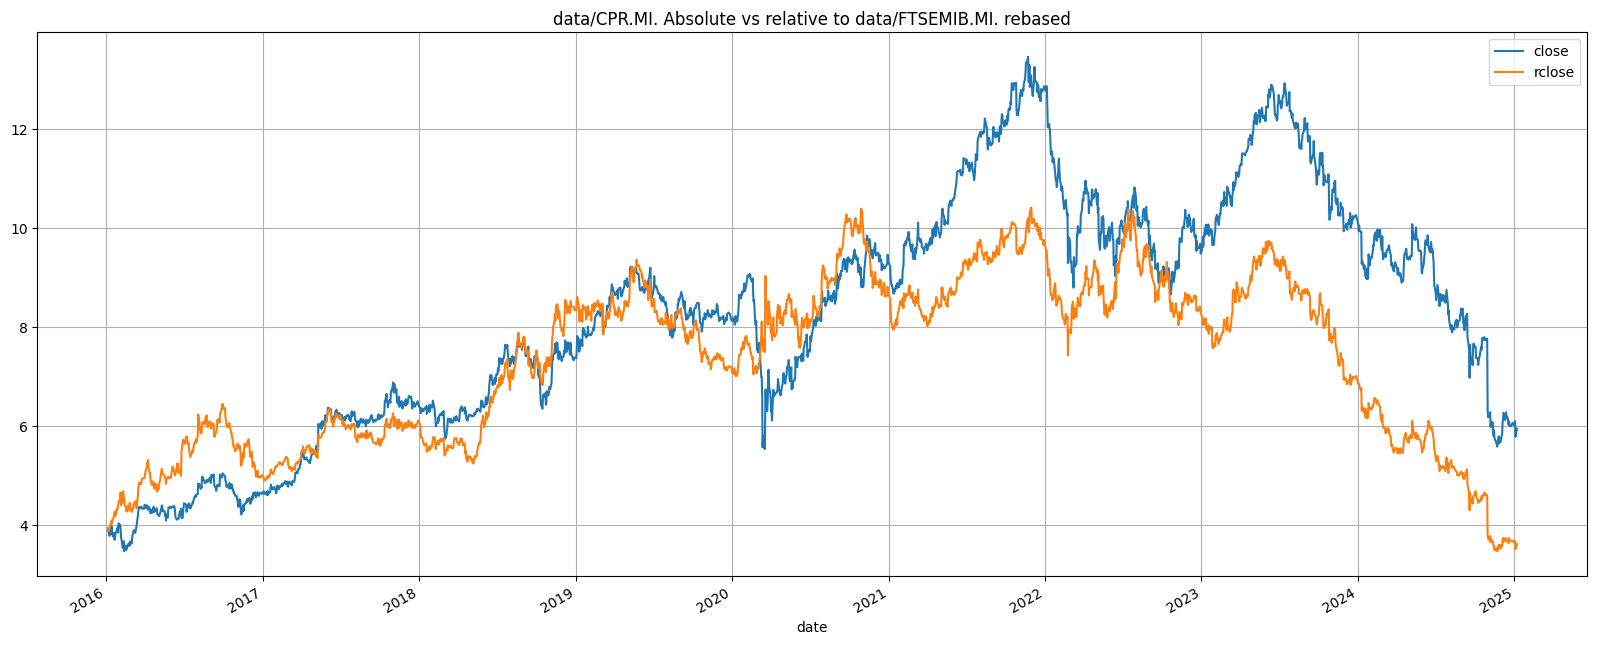

In [4]:
plot_abs_rel(df, ticker, bm_df, bm_name)

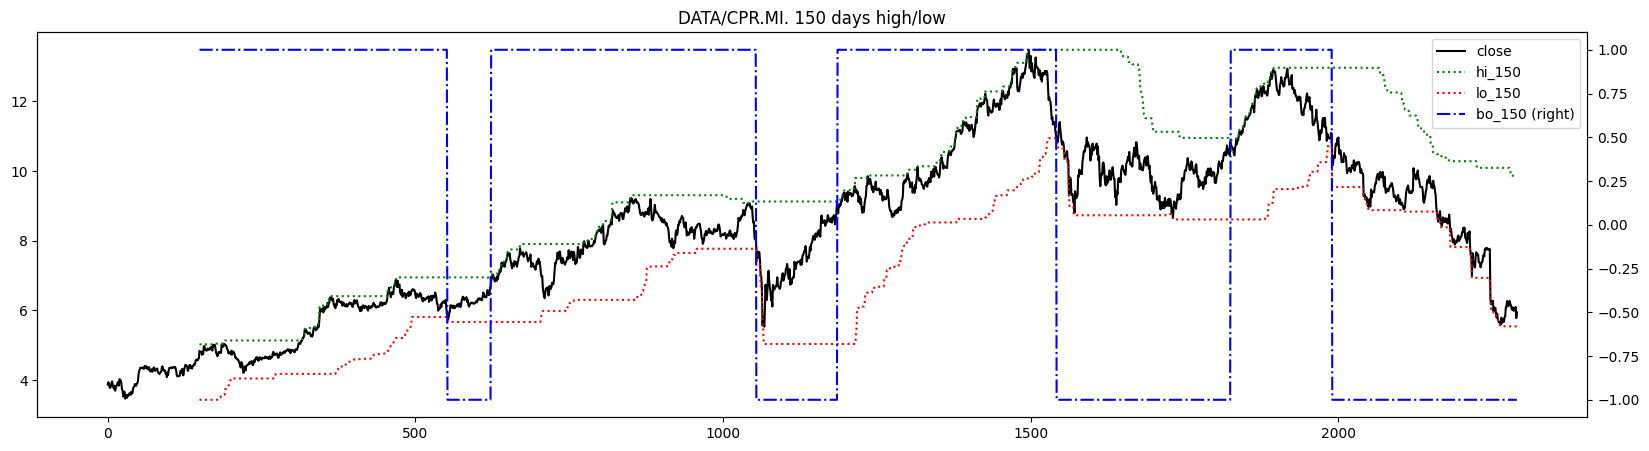

In [5]:
window_bo = 150
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

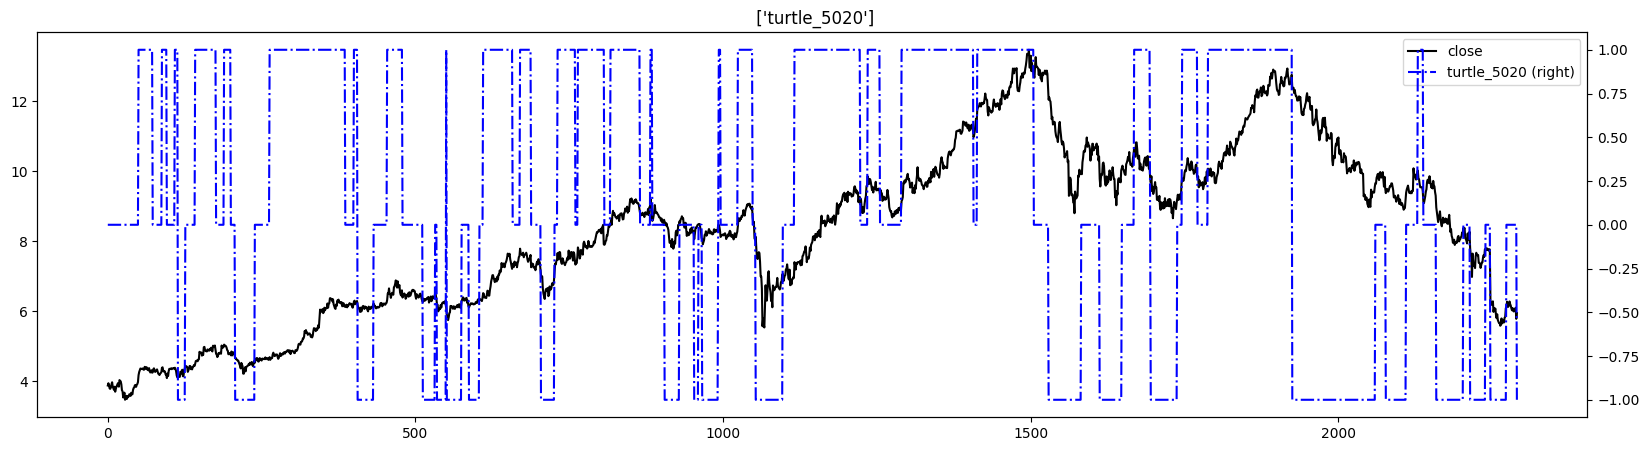

In [6]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

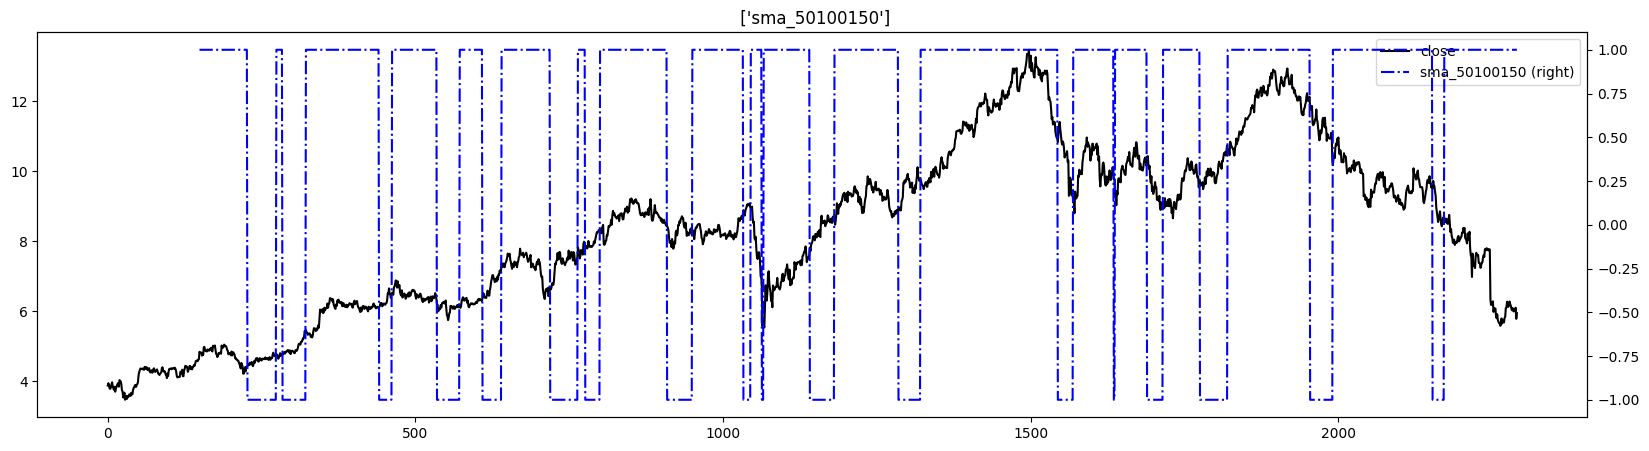

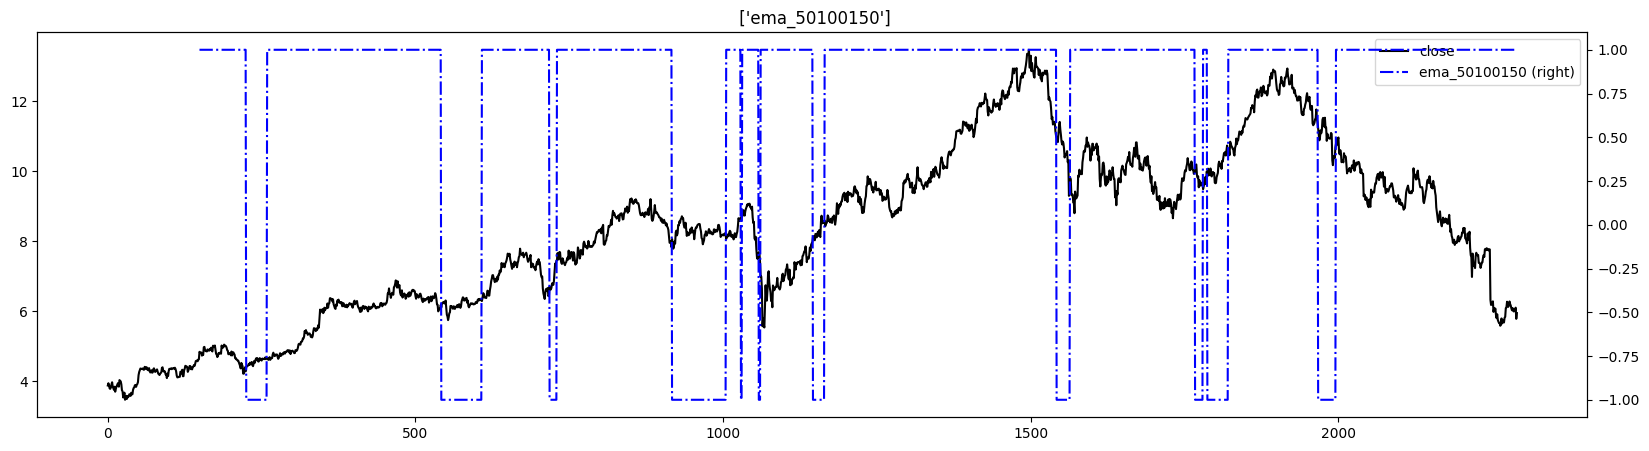

In [7]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

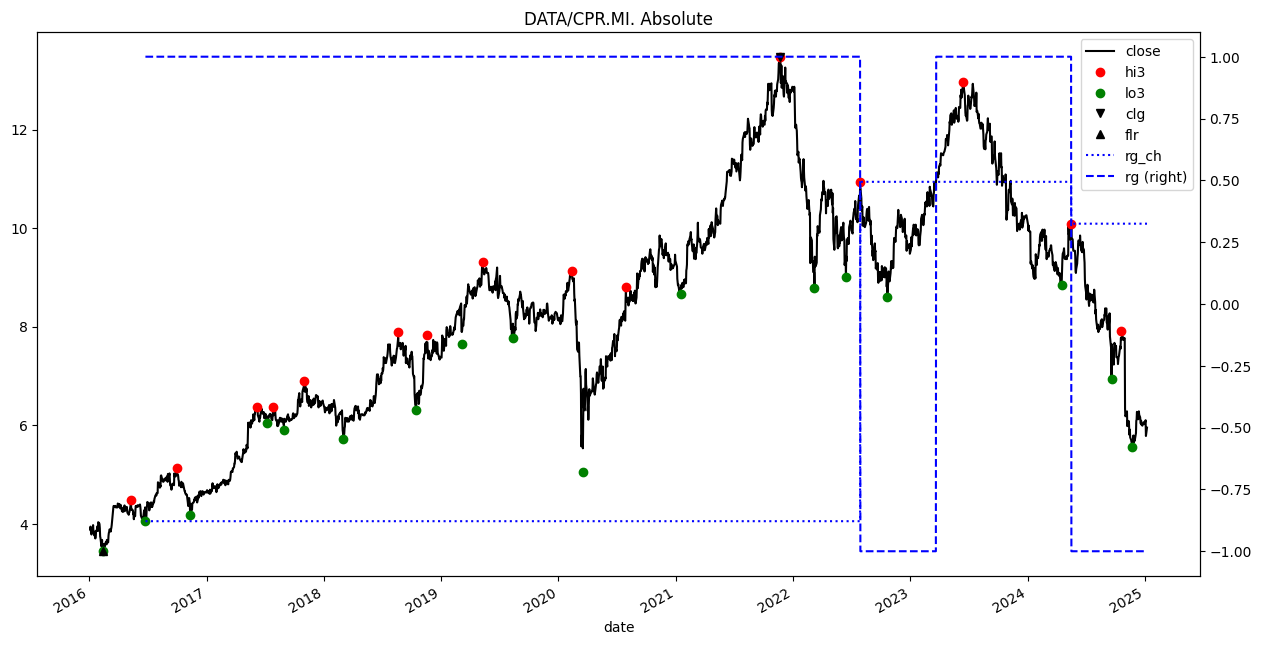

In [8]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

1
1


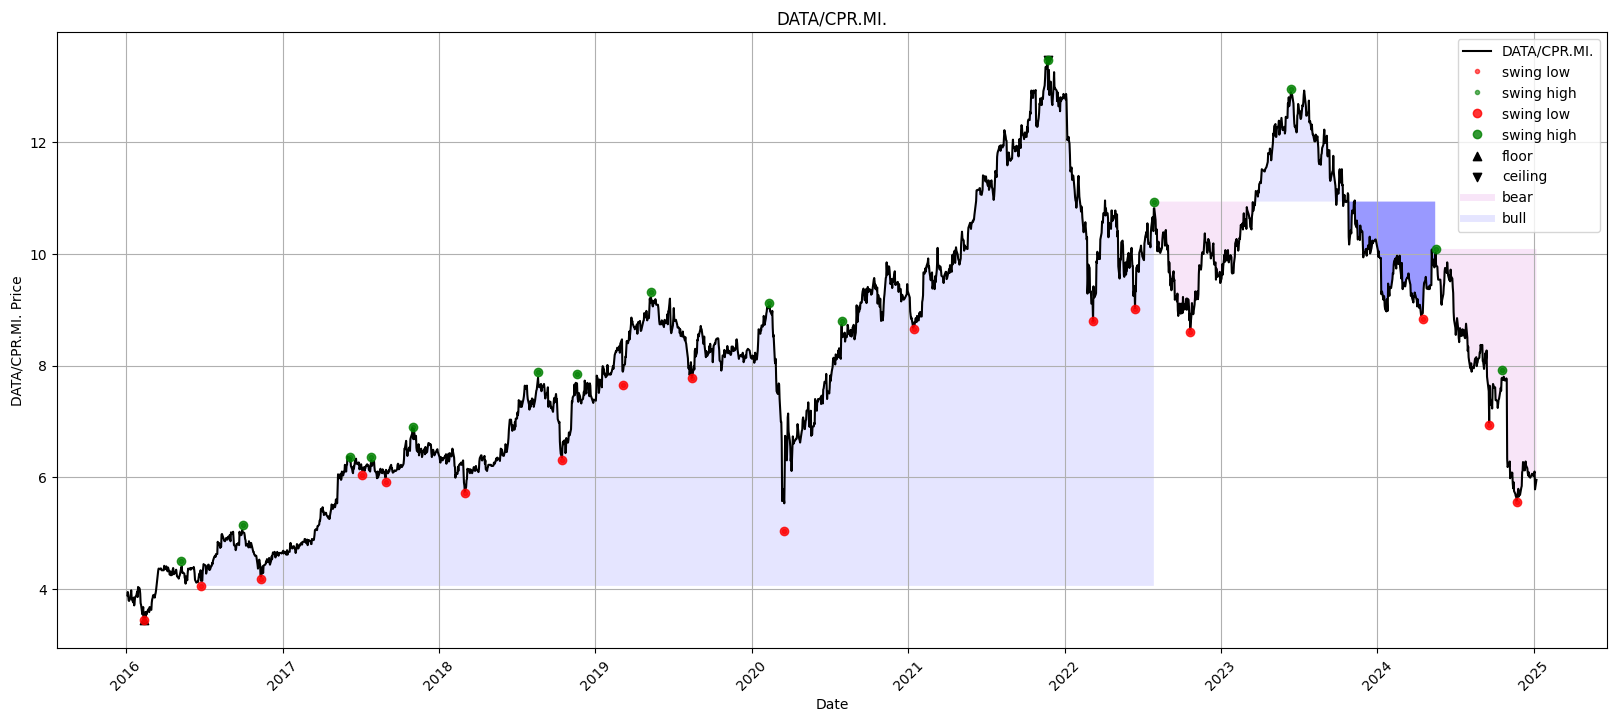

In [9]:
plot_regime_abs(df_fc, ticker)

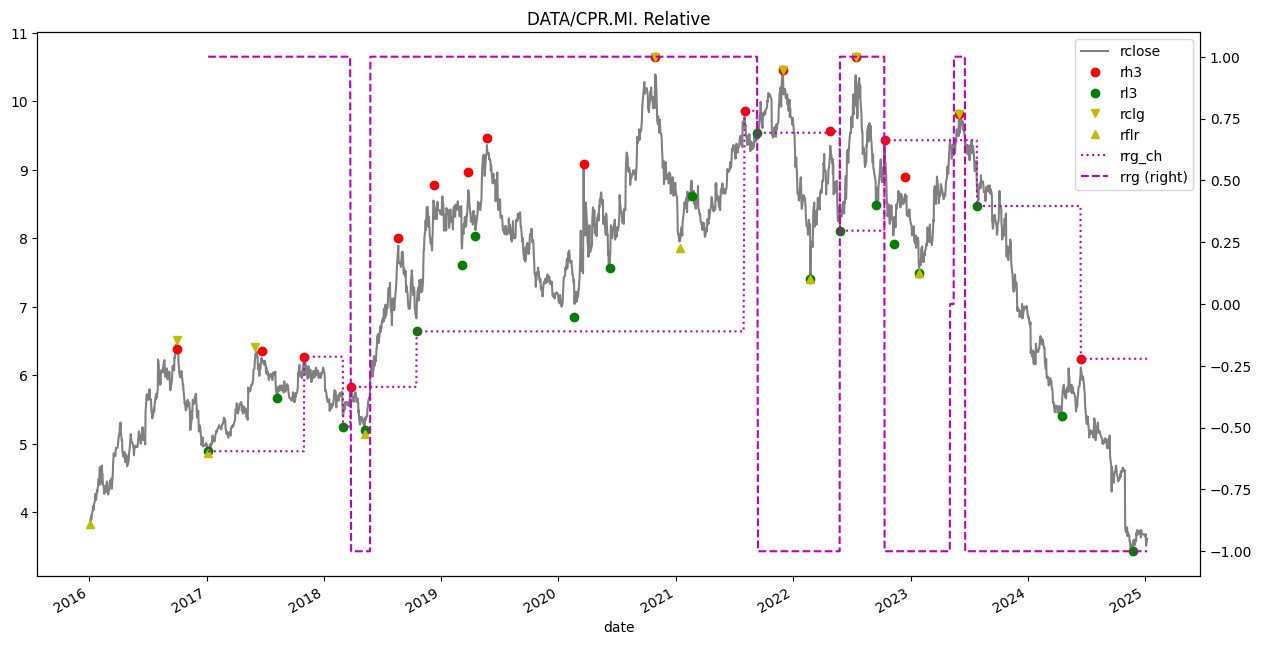

In [10]:
plot_signal_rel(df_fc, ticker)

1
1


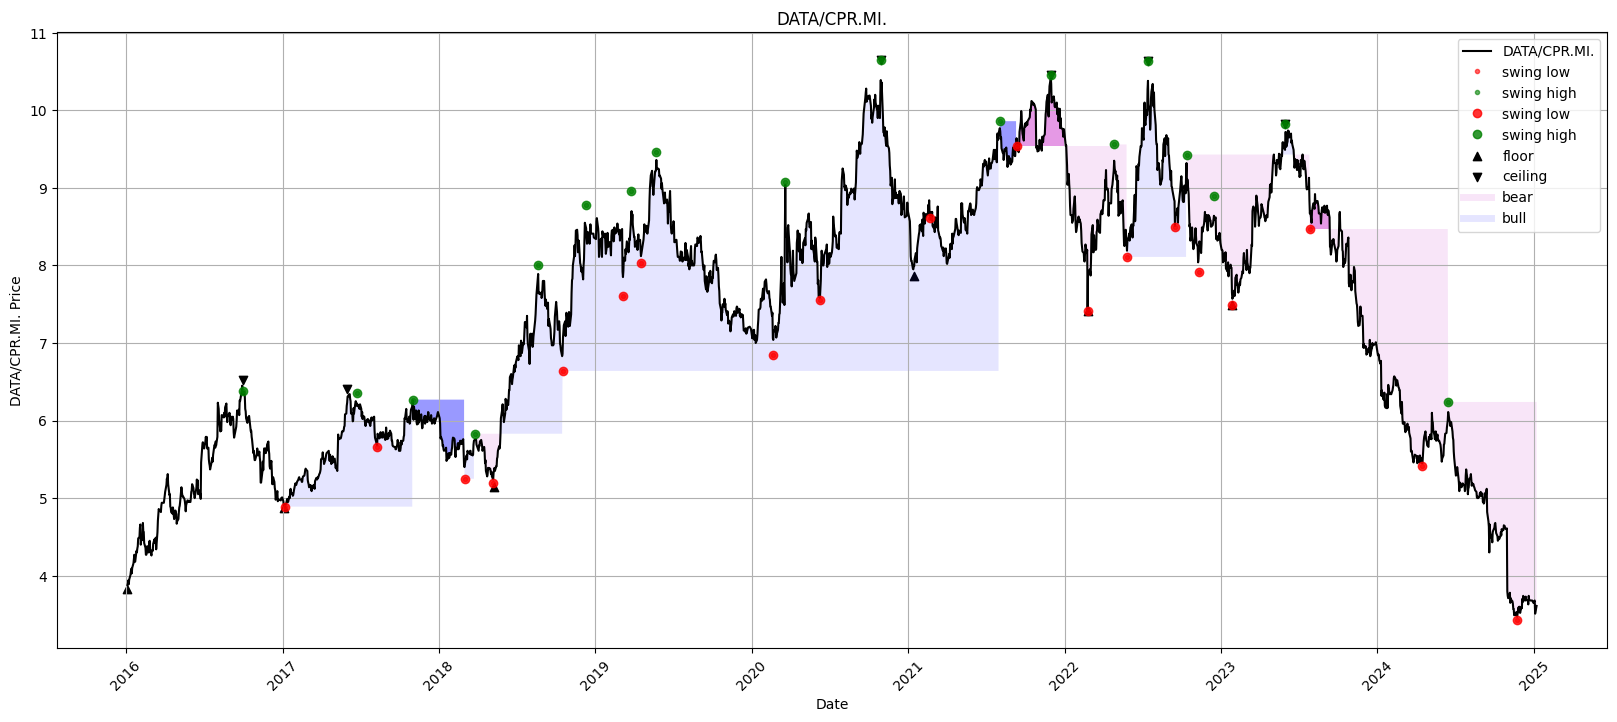

In [11]:
plot_regime_rel(df_fc, ticker)

In [12]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [13]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [14]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [15]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

close  stop_loss  tt_cumul
method                                            
breakout                5.946      6.320  1.122740
ema                     5.946      5.712  0.143273
floor_ceiling           5.950      6.320  2.929248
floor_ceiling_relative  5.950      6.320  3.169053
sma                     5.946      5.712  0.050338
turtle                  5.946      6.320  1.534855

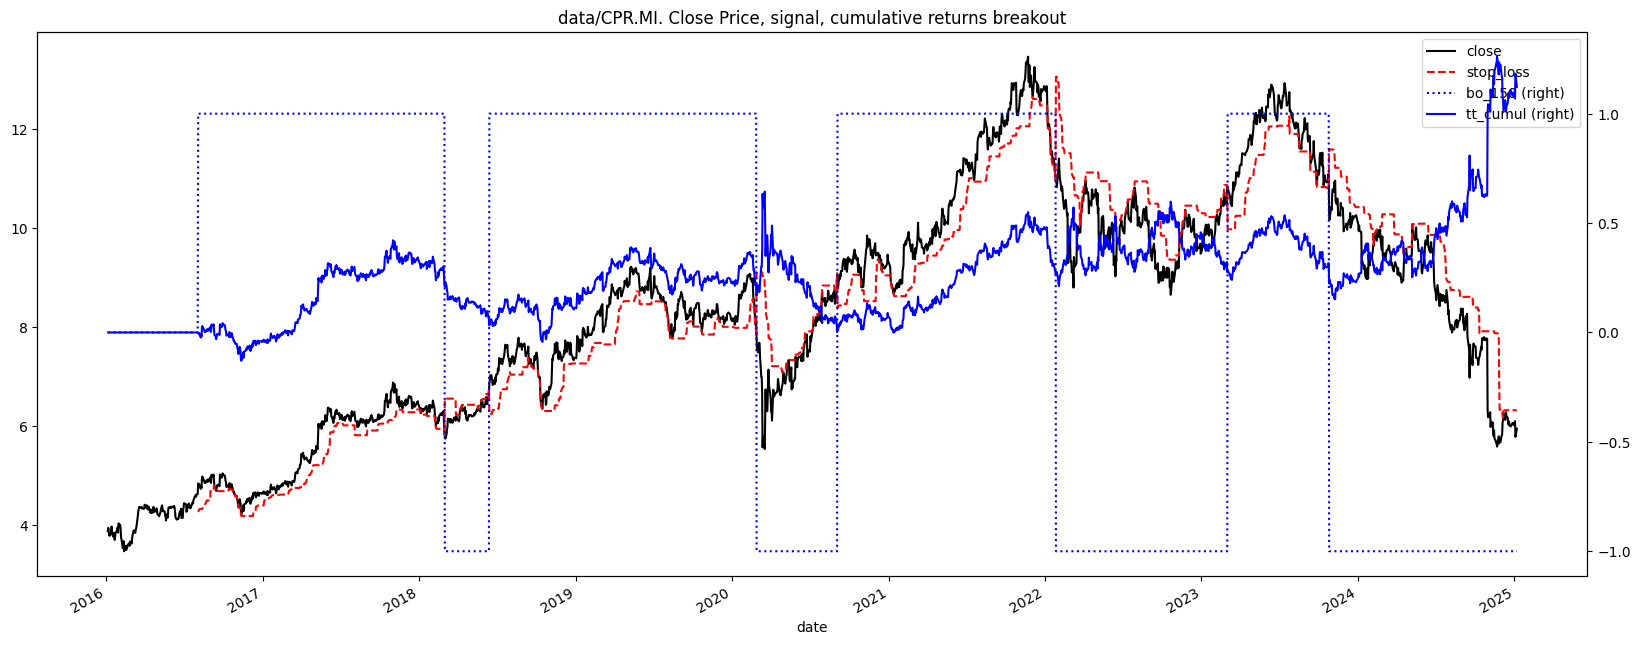

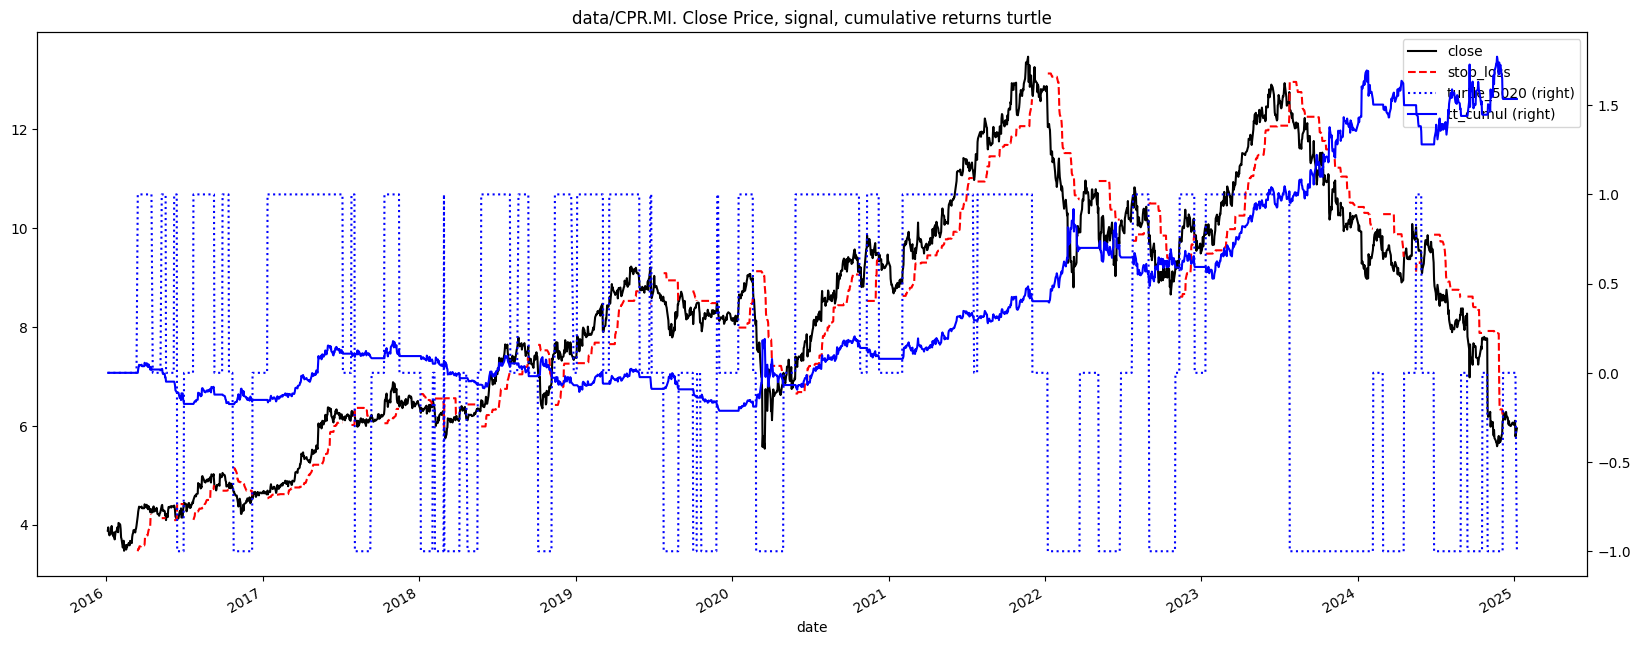

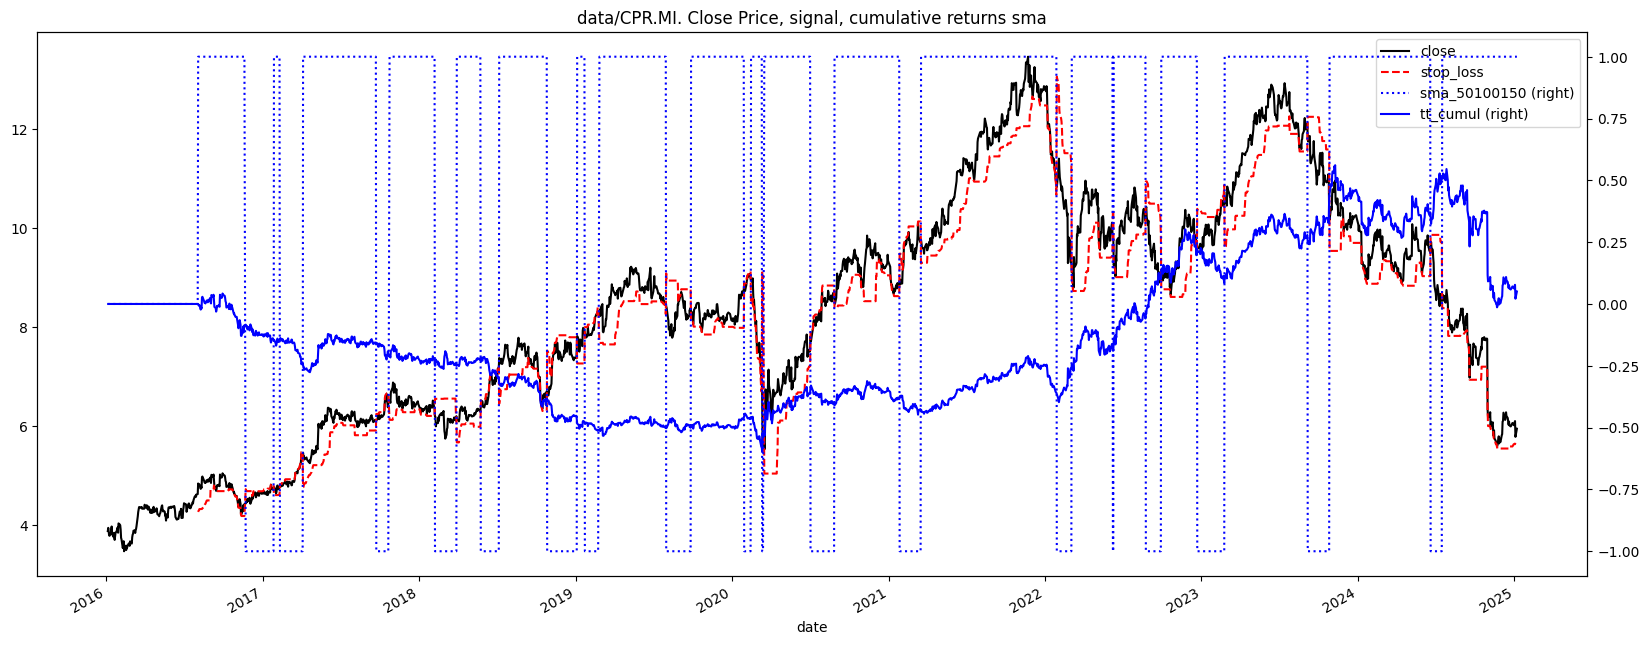

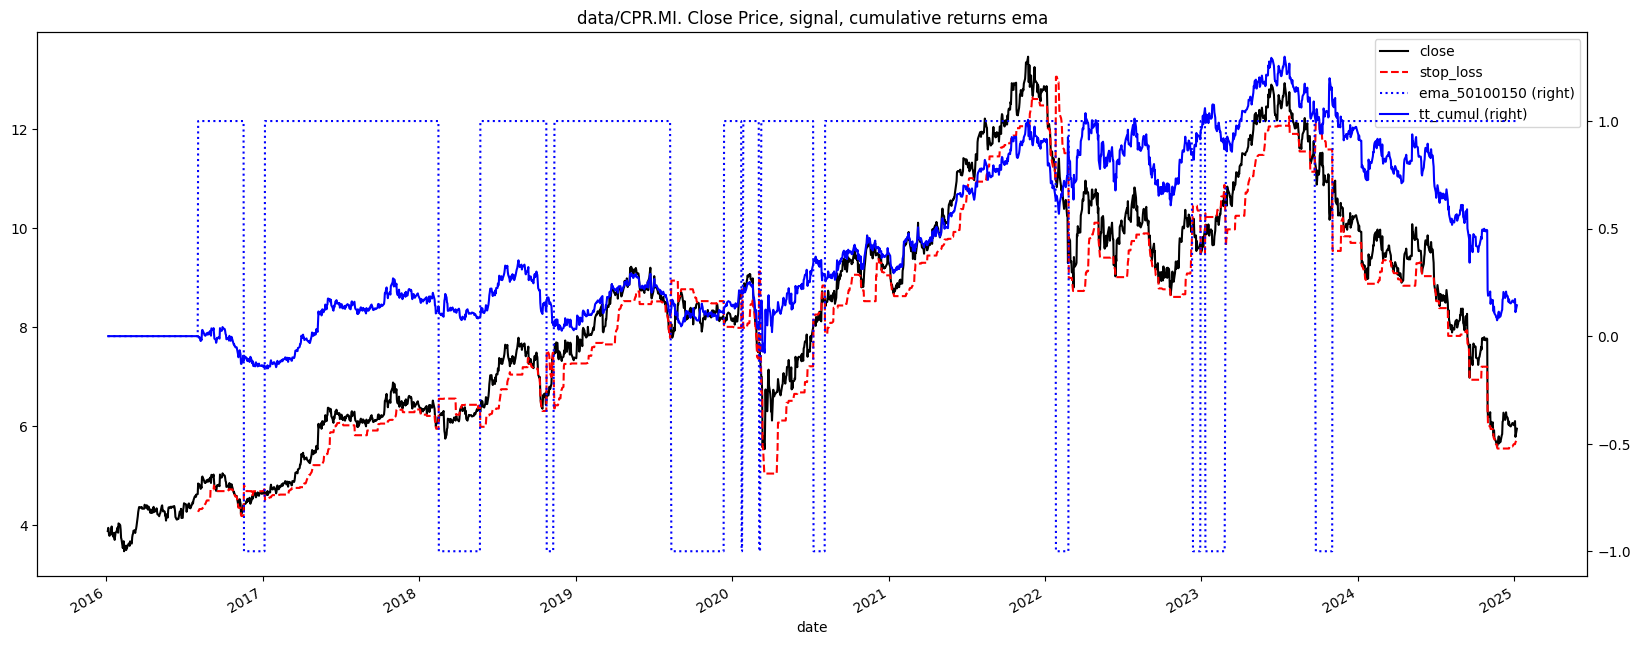

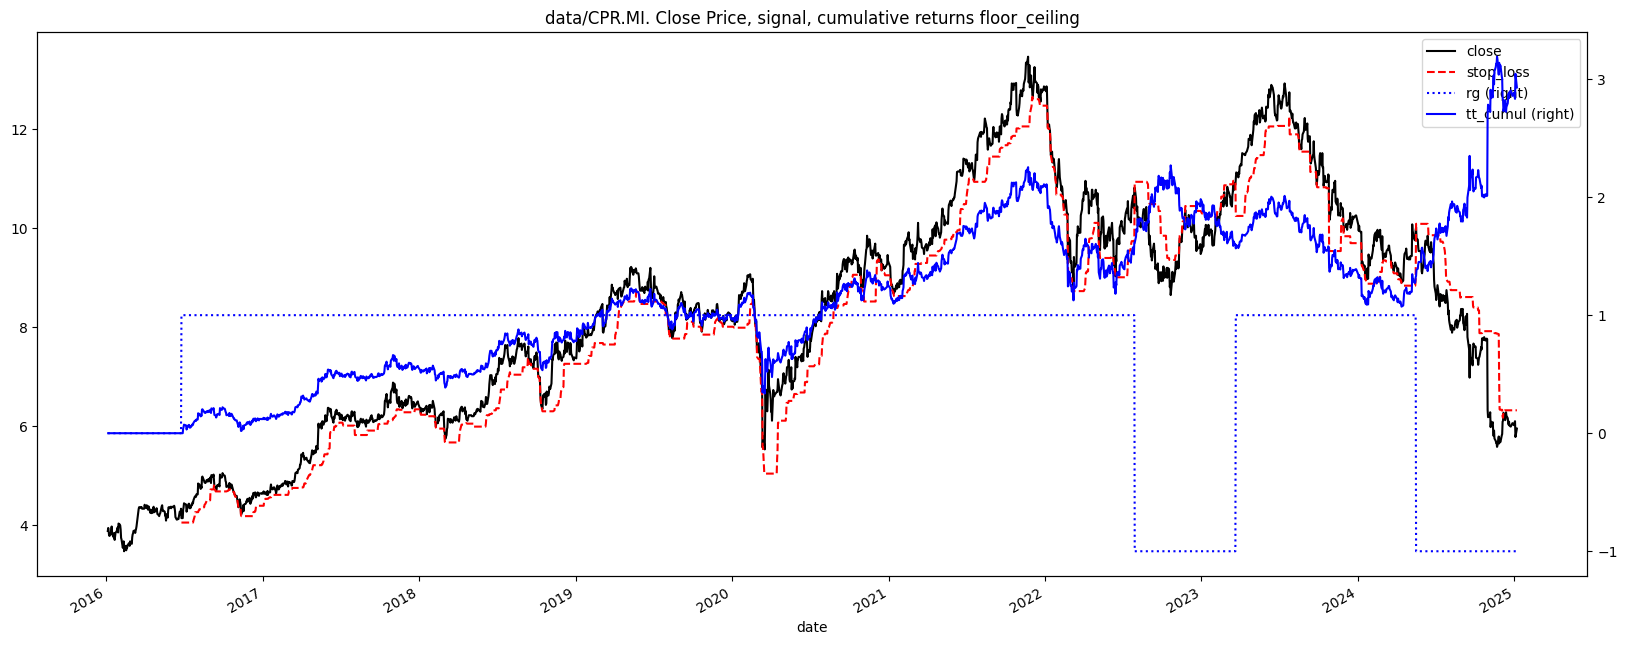

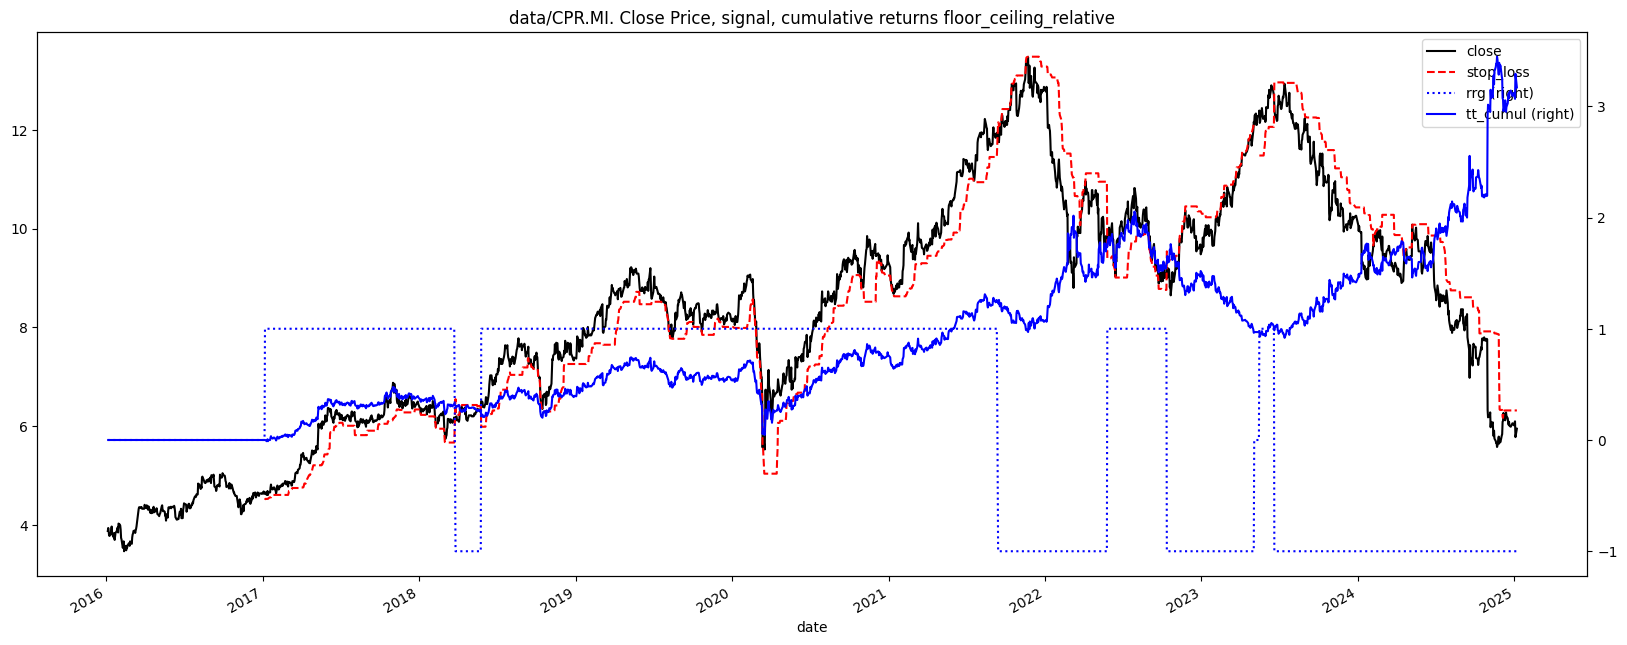

In [16]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

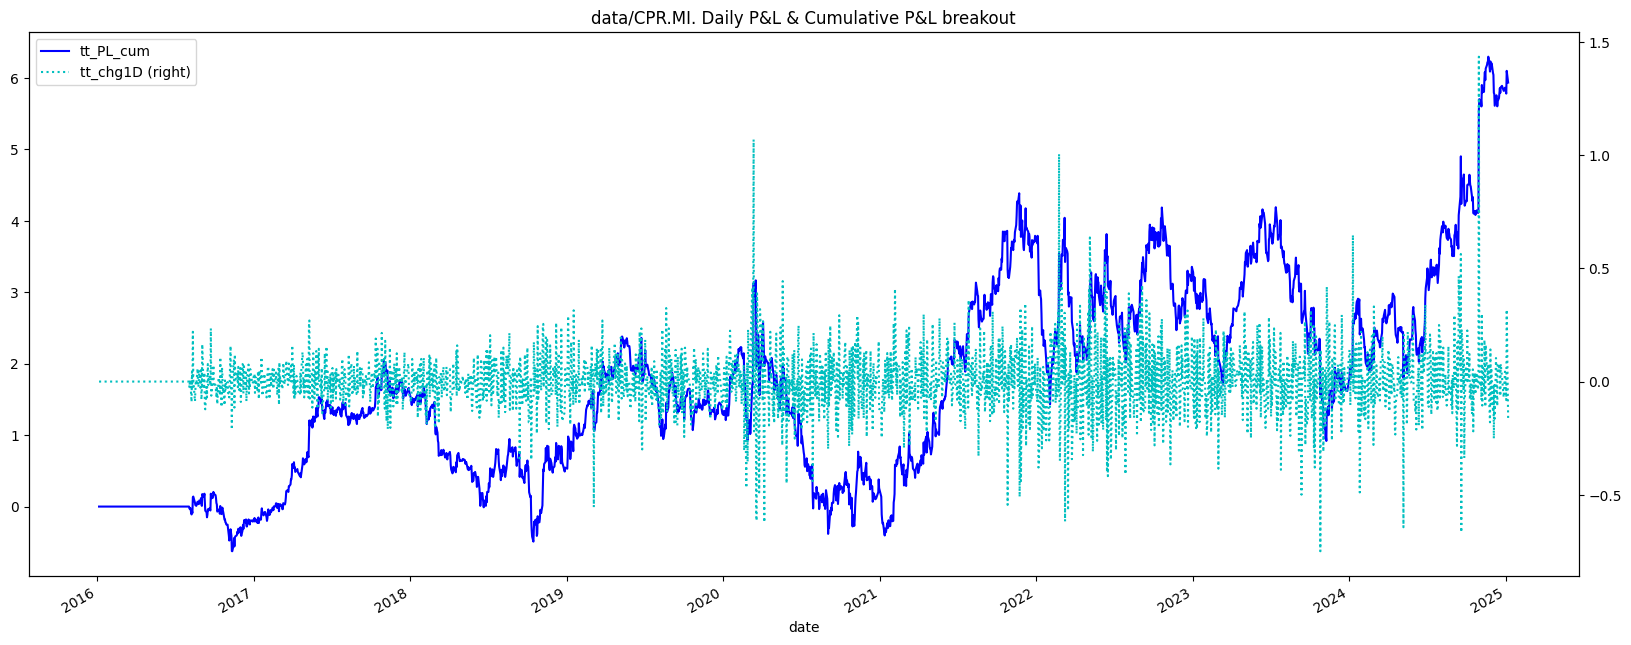

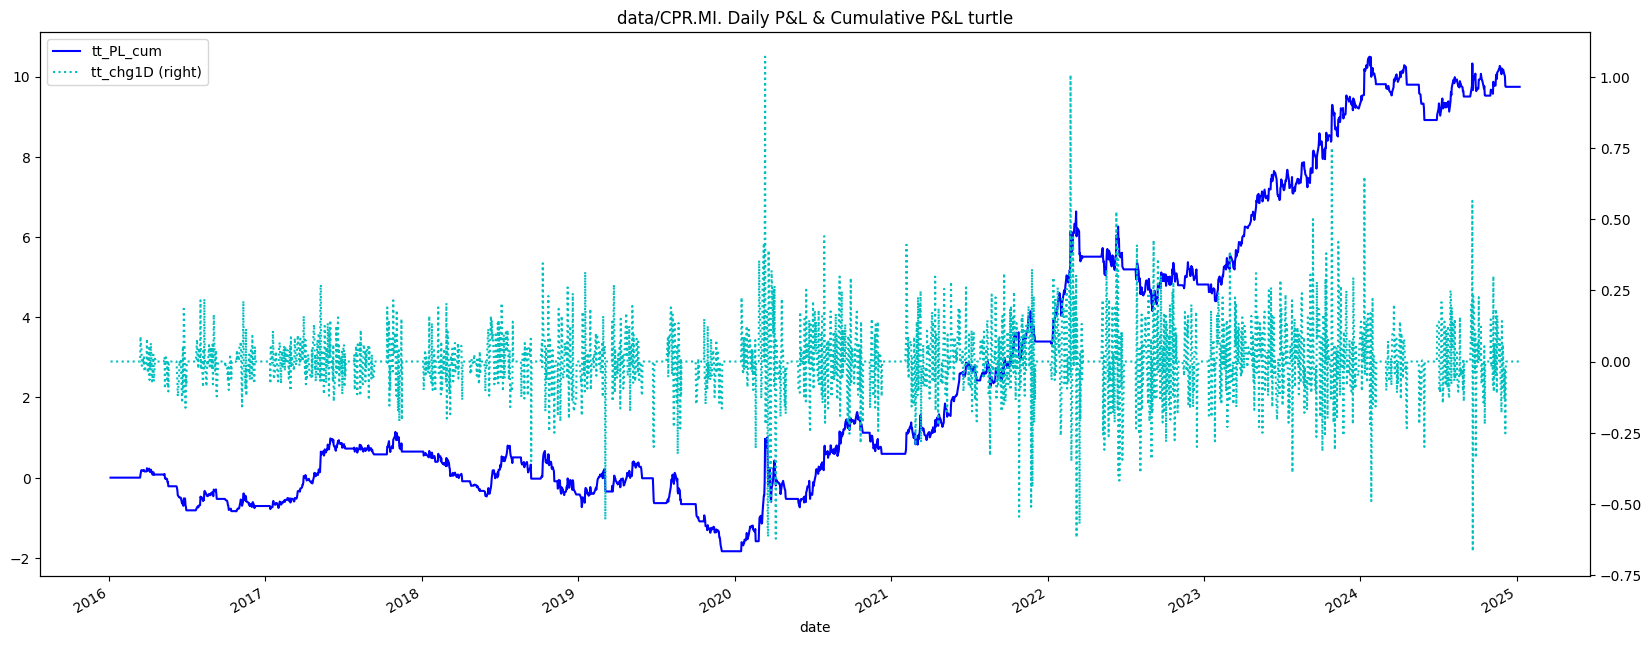

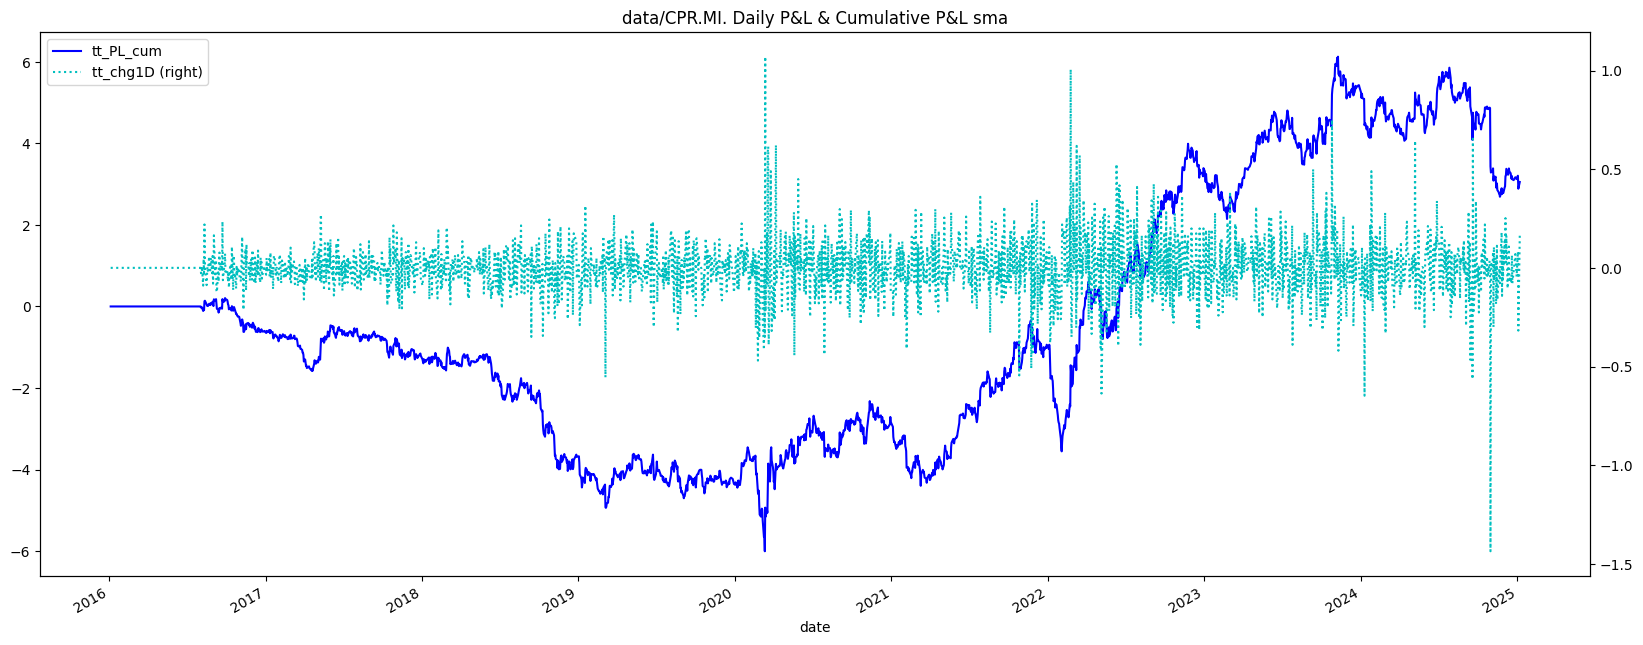

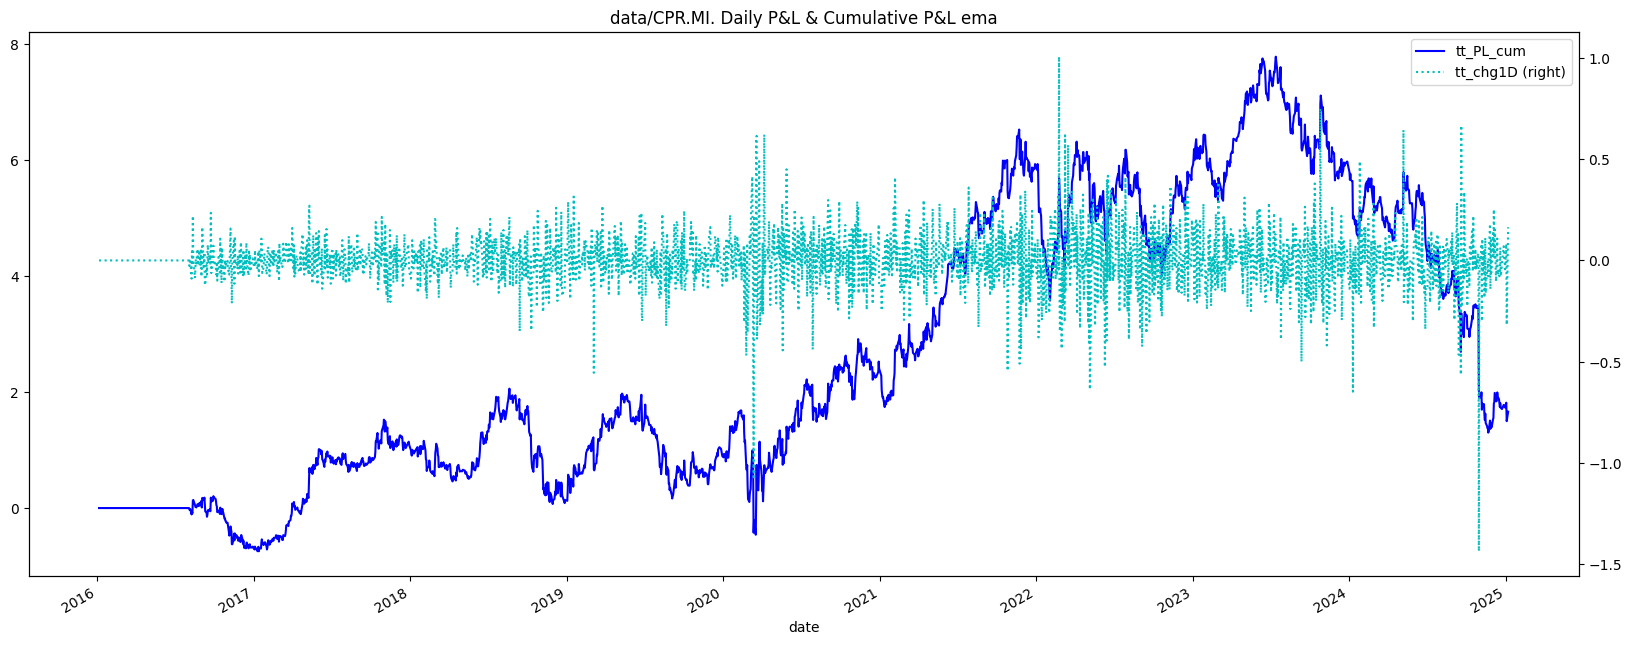

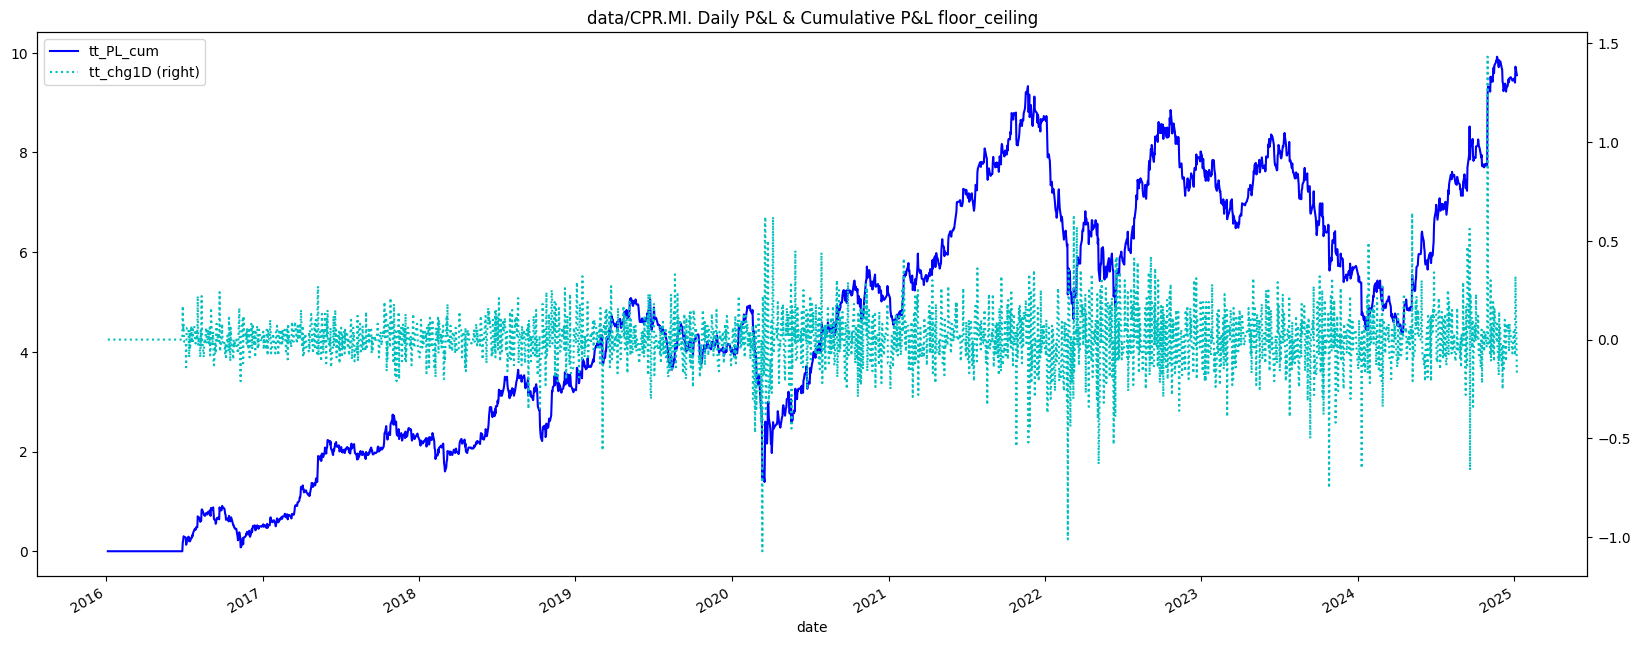

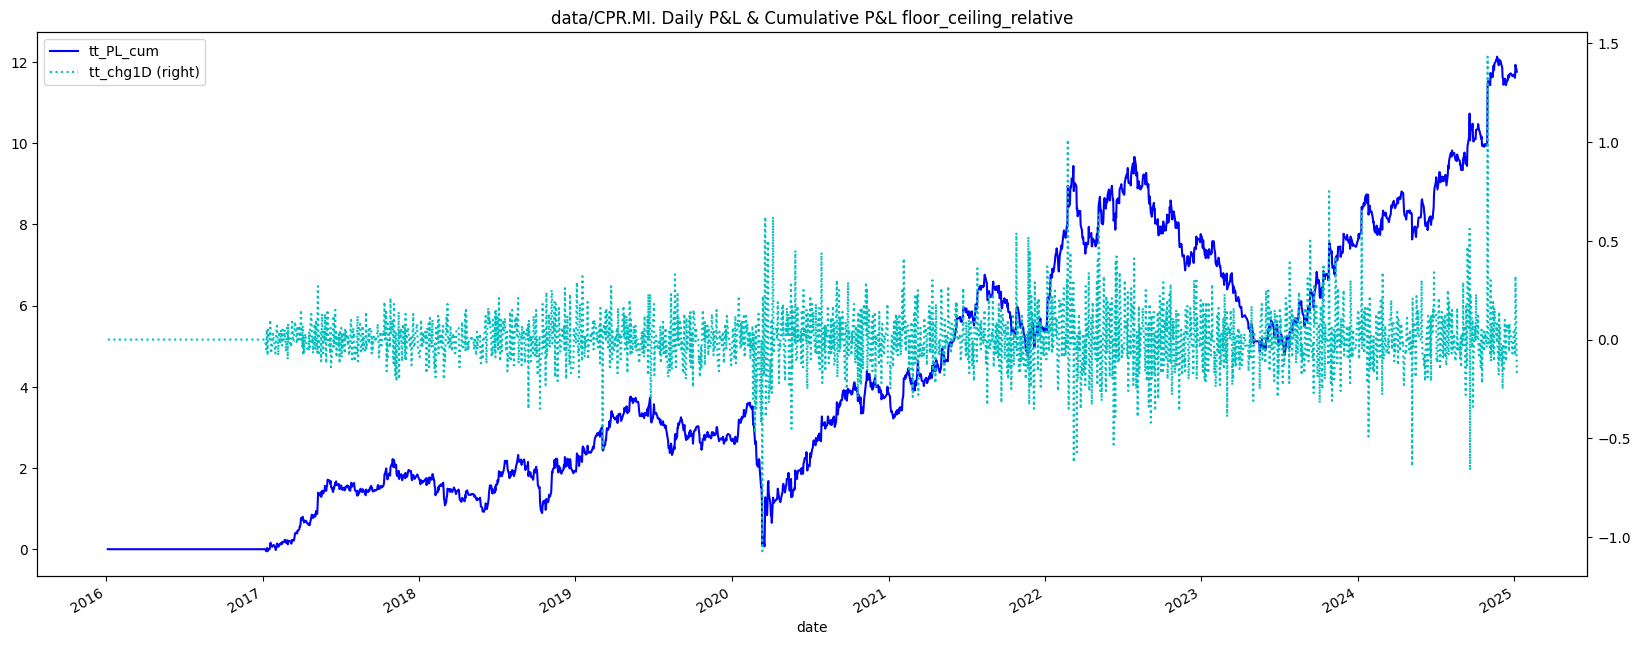

In [17]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [18]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

trading_edge  geometric_expectancy      kelly
method                                                               
breakout                    0.001789              0.001754  26.187131
ema                        -0.001454             -0.001489 -21.273716
floor_ceiling               0.001953              0.001918  28.535928
floor_ceiling_relative      0.001953              0.001918  28.535928
sma                        -0.001454             -0.001489 -21.273716
turtle                      0.001512              0.001501  62.078114

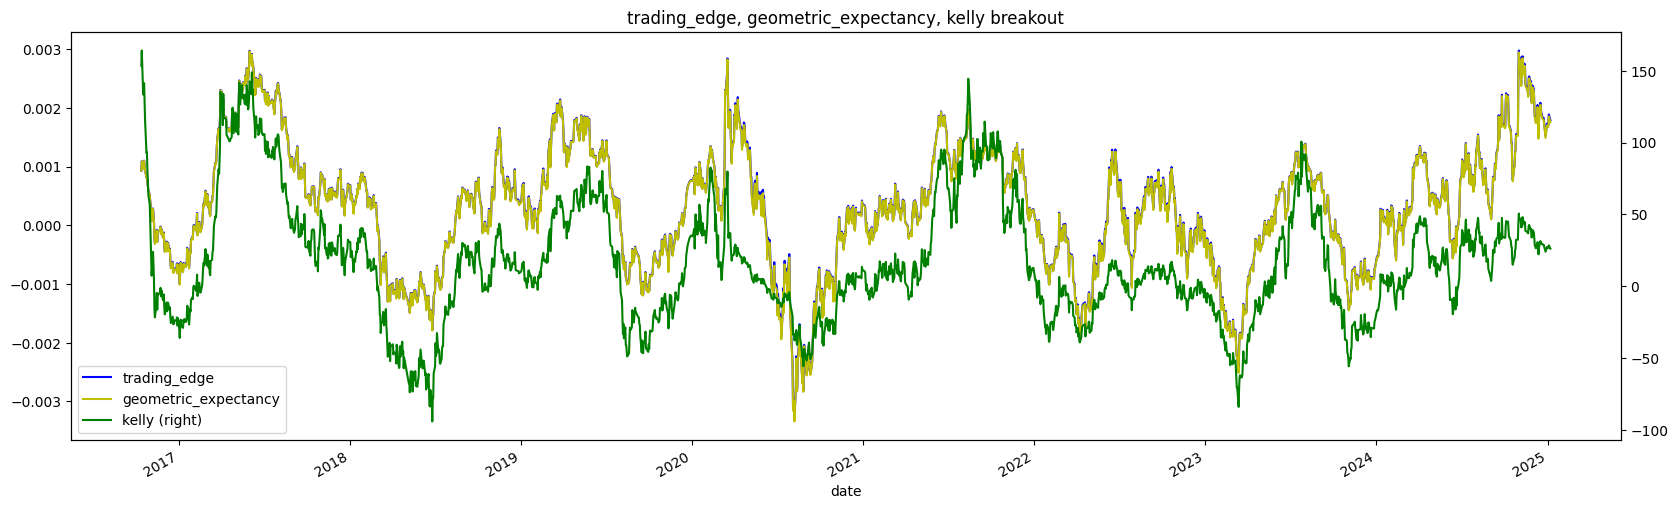

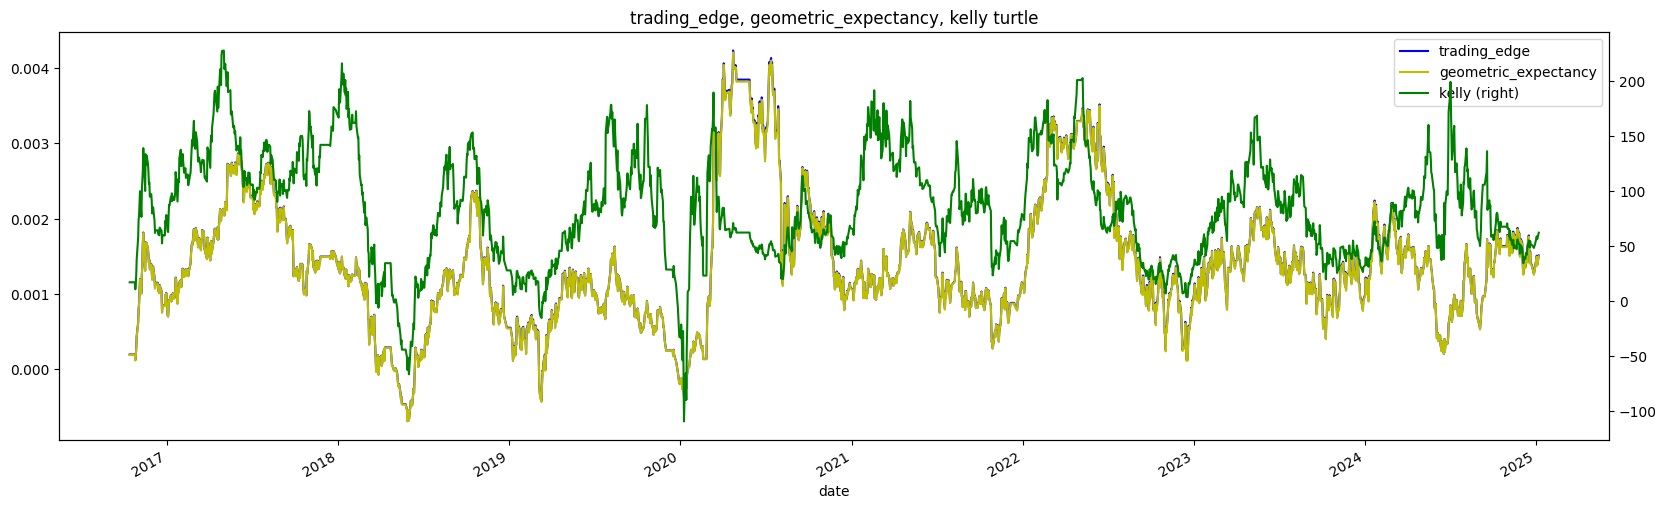

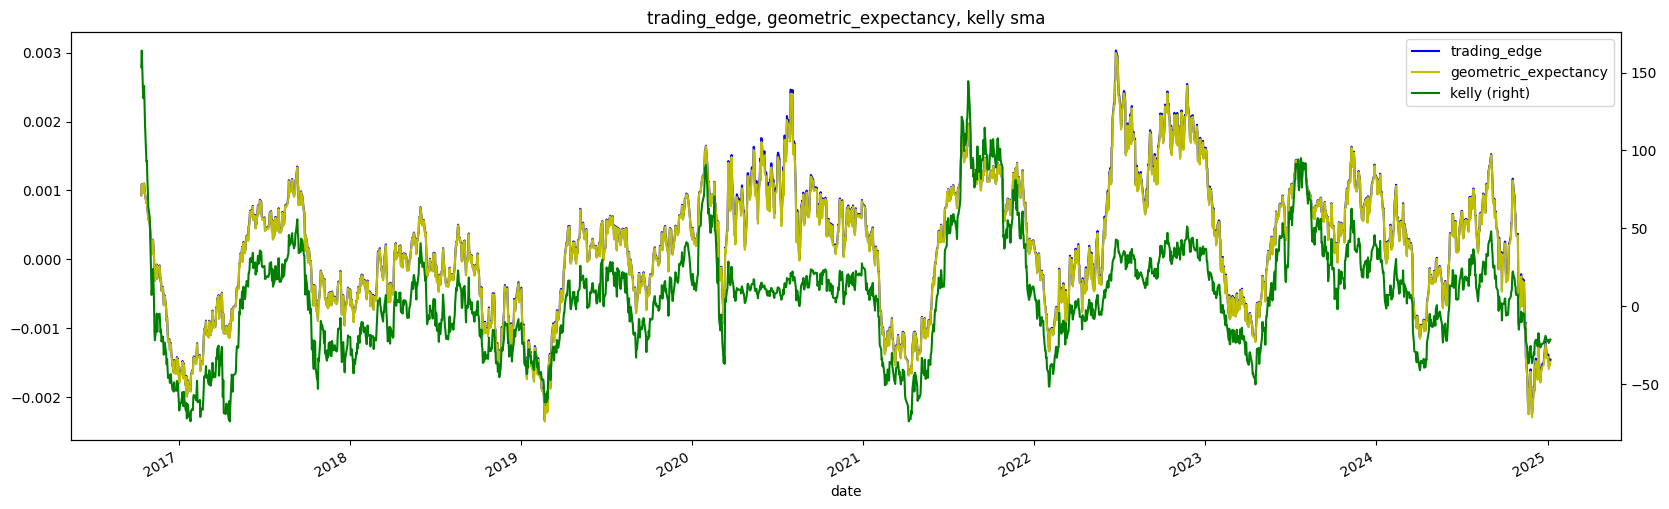

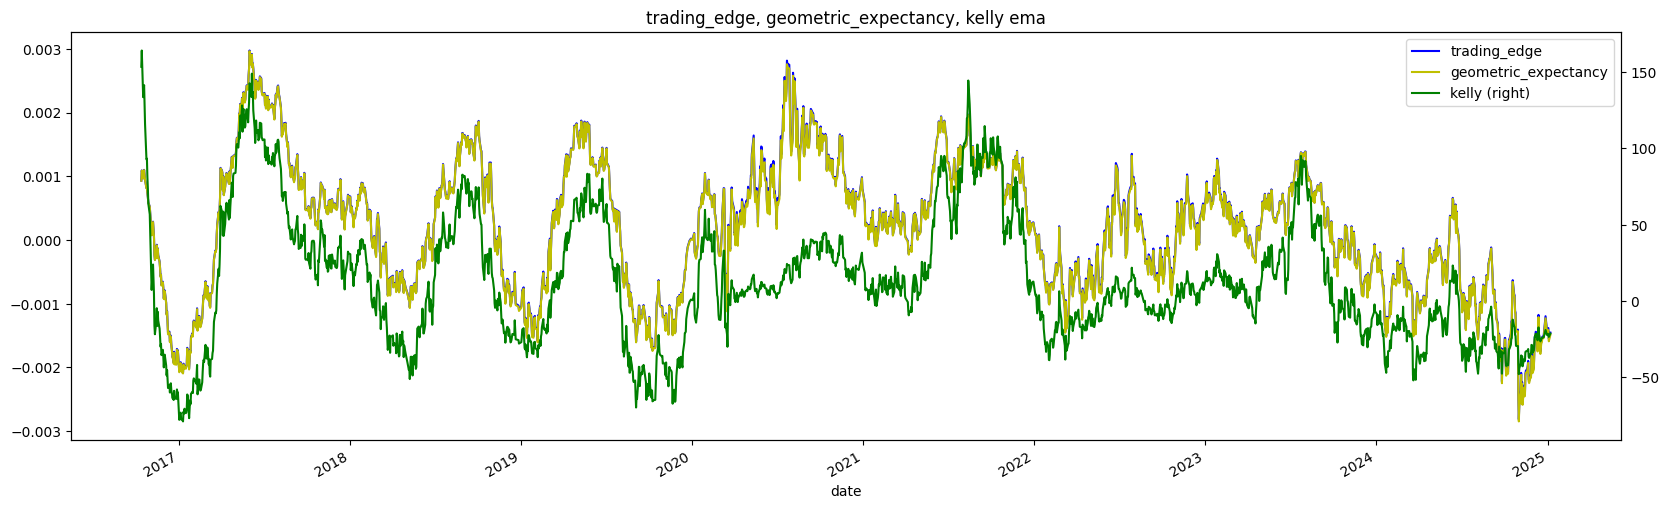

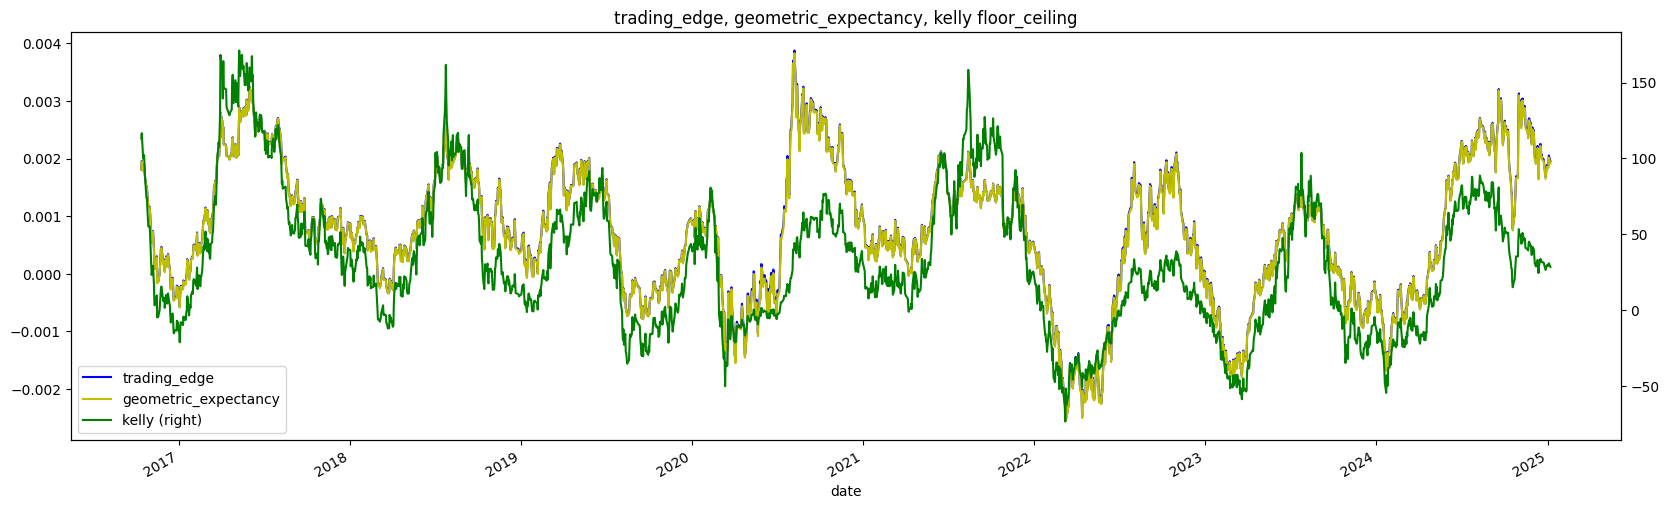

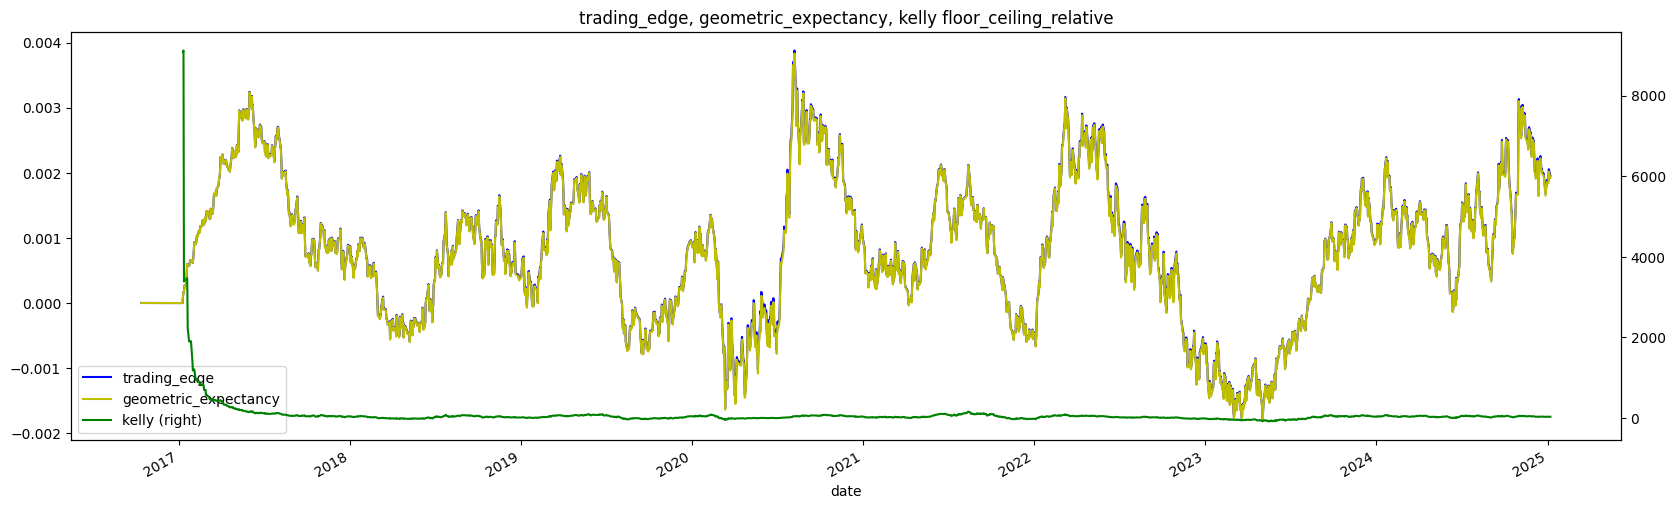

In [19]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [20]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [21]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [22]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [23]:
pd.concat(output_signals, axis=0)[['constant_risk', 'convex_risk', 'concave_risk']]

constant_risk  convex_risk  concave_risk
date                                                         
2016-01-04 08:00:00       0.019388     0.029081      0.029081
2016-01-05 08:00:00       0.019713     0.029569      0.029569
2016-01-06 08:00:00       0.019412     0.025606      0.029083
2016-01-07 08:00:00       0.018963     0.019942      0.028154
2016-01-08 08:00:00       0.018913     0.017241      0.027531
...                            ...          ...           ...
2024-12-27 08:00:00       0.030300     0.033675      0.033675
2024-12-30 08:00:00       0.030100     0.033675      0.033675
2025-01-02 08:00:00       0.030500     0.033675      0.033675
2025-01-03 08:00:00       0.028900     0.033675      0.033675
2025-01-06 16:39:11       0.029750     0.033675      0.033675

[41238 rows x 3 columns]

In [24]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

constant        concave         convex  \
method                                                                
breakout                104745.600891  107711.601448  107711.601448   
ema                     101330.400848  102161.901379  102161.901379   
floor_ceiling           152525.000000  179265.000000  179265.000000   
floor_ceiling_relative  120880.000000  127080.000000  127080.000000   
sma                     102442.400360  103968.900585  103968.900585   
turtle                  108758.645916  112931.093979  108601.945114   

                         equal_weight  tt_PL_cum_fx  
method                                               
breakout                105932.001114      5.932001  
ema                     101663.001060      1.663001  
floor_ceiling           111460.000000      9.550000  
floor_ceiling_relative  107776.000000     11.760000  
sma                     103053.000450      3.053000  
turtle                  104997.300911      9.745001

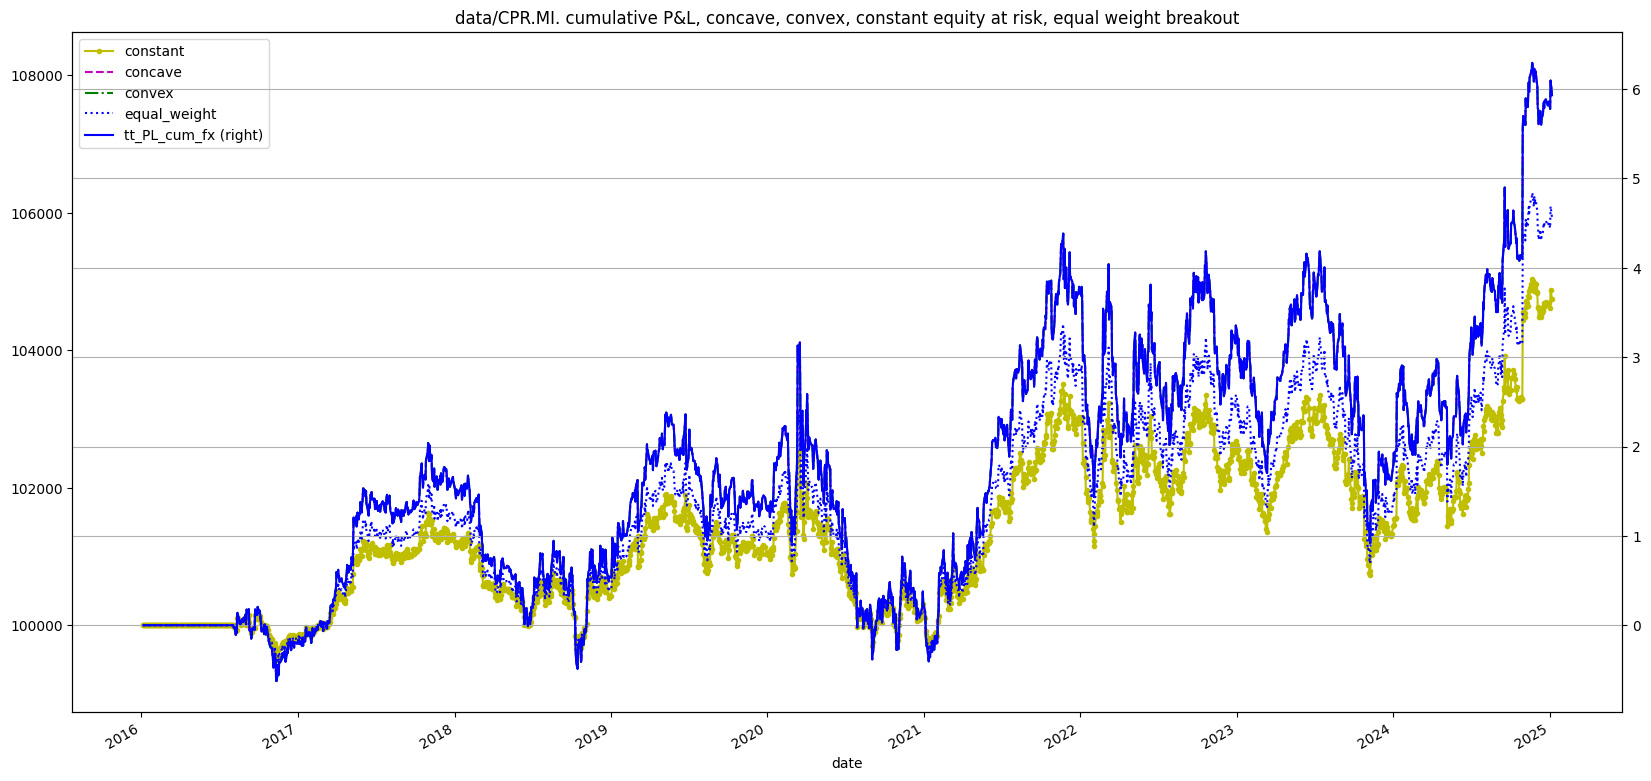

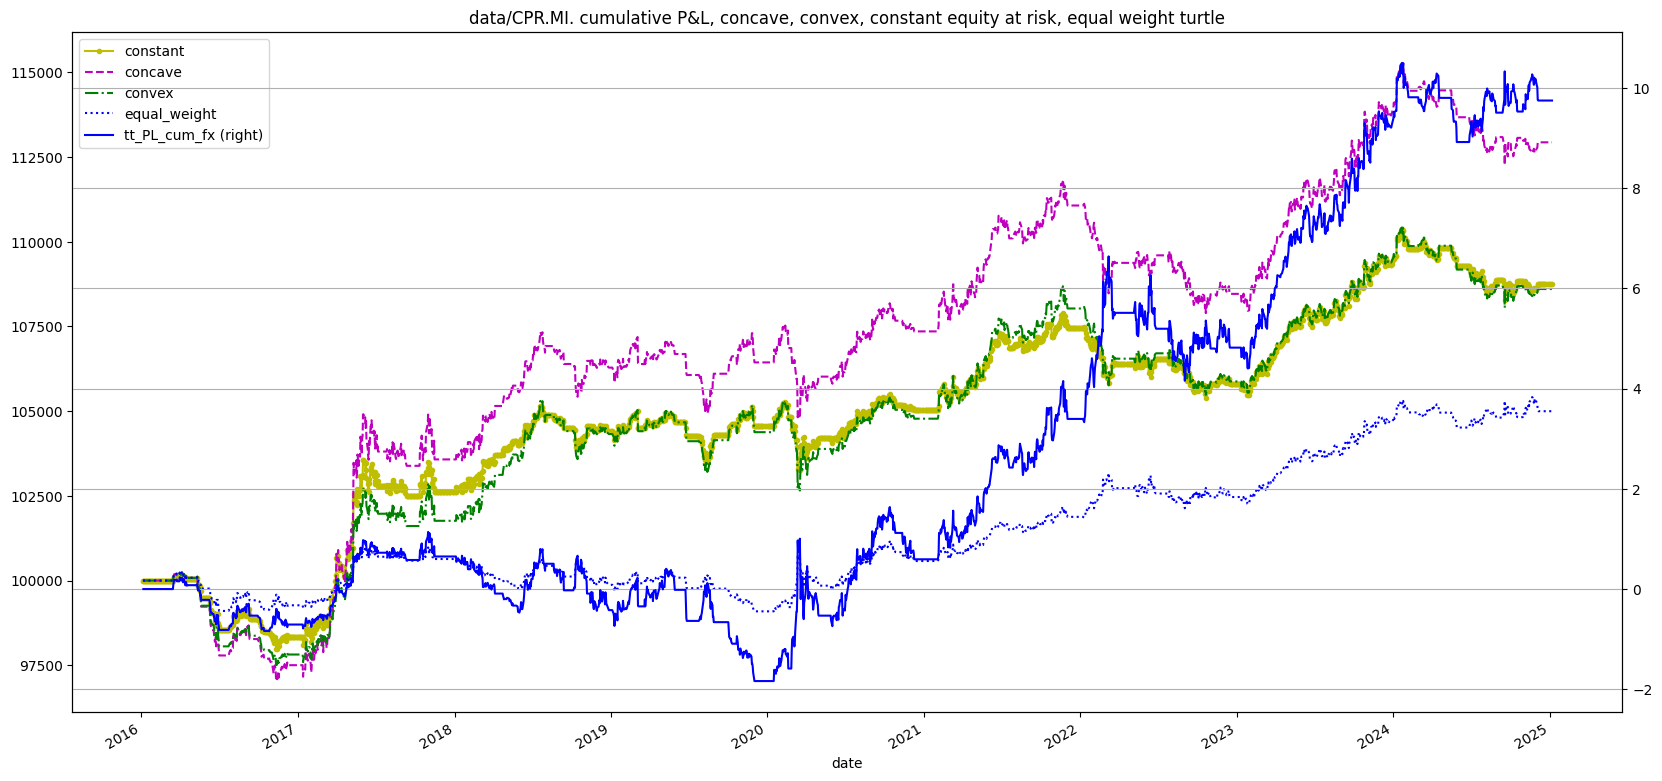

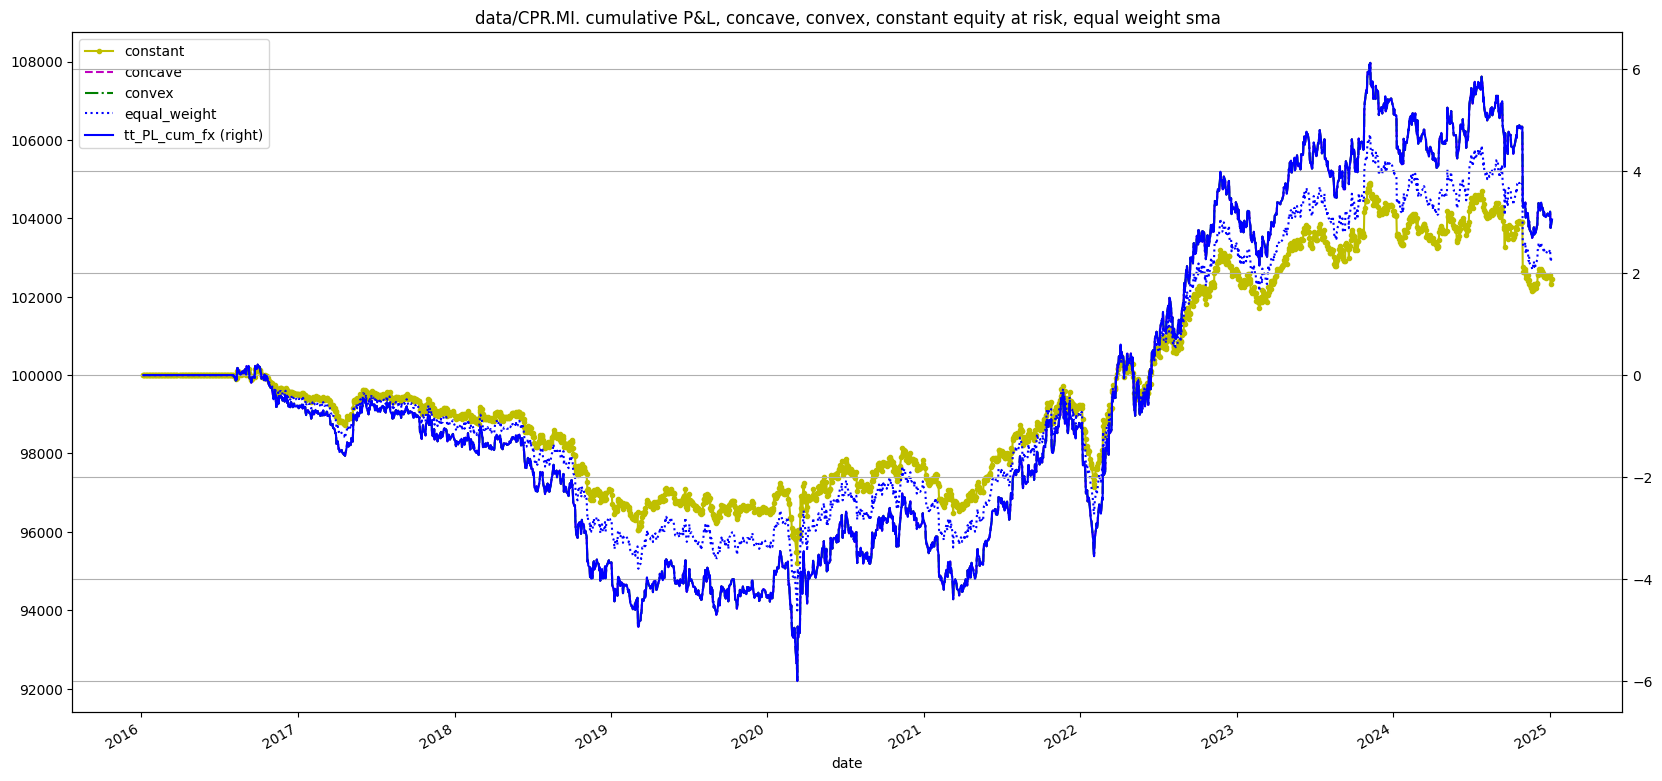

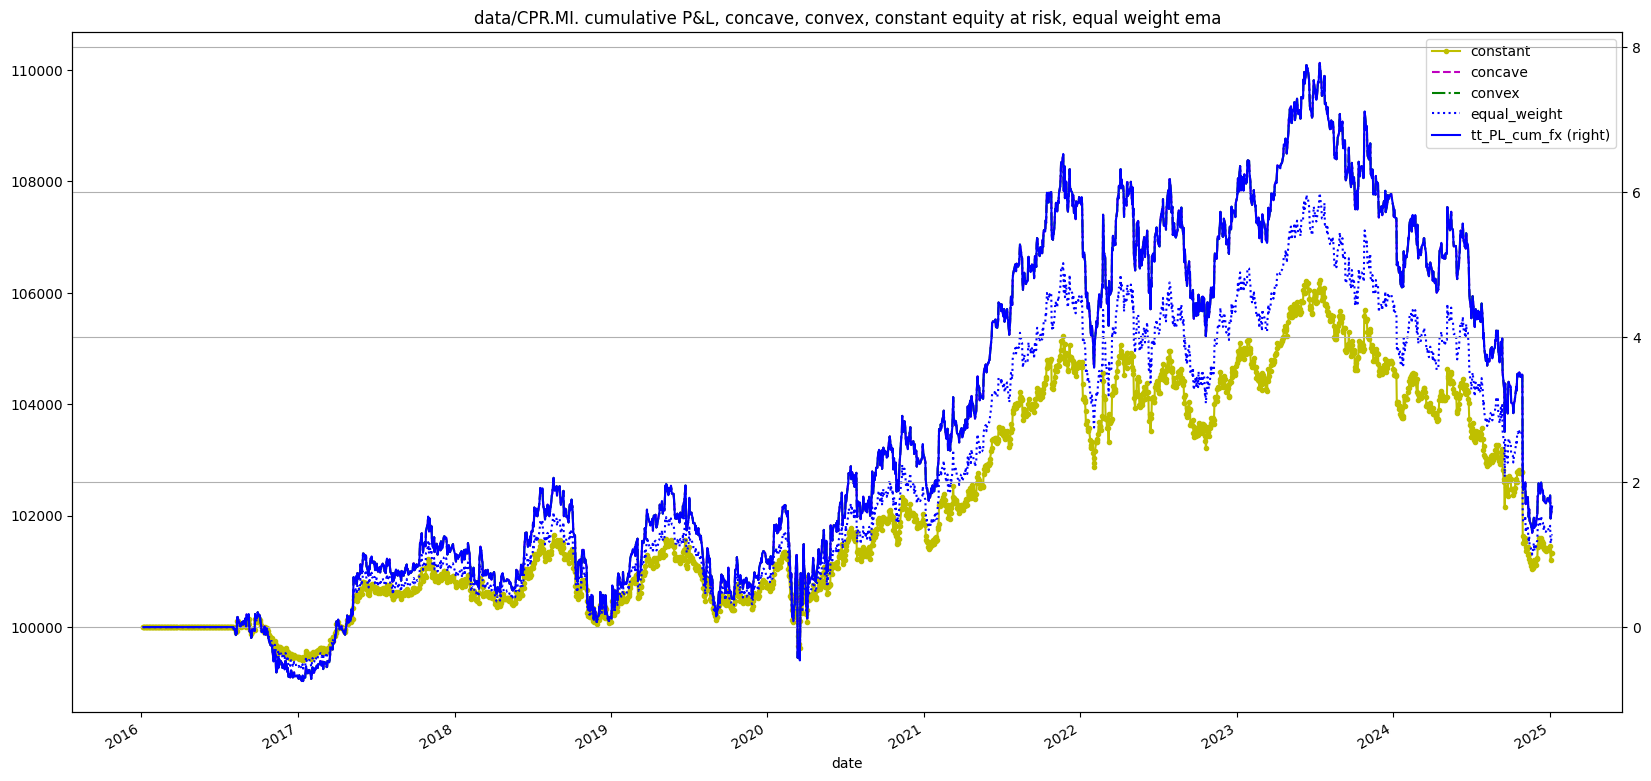

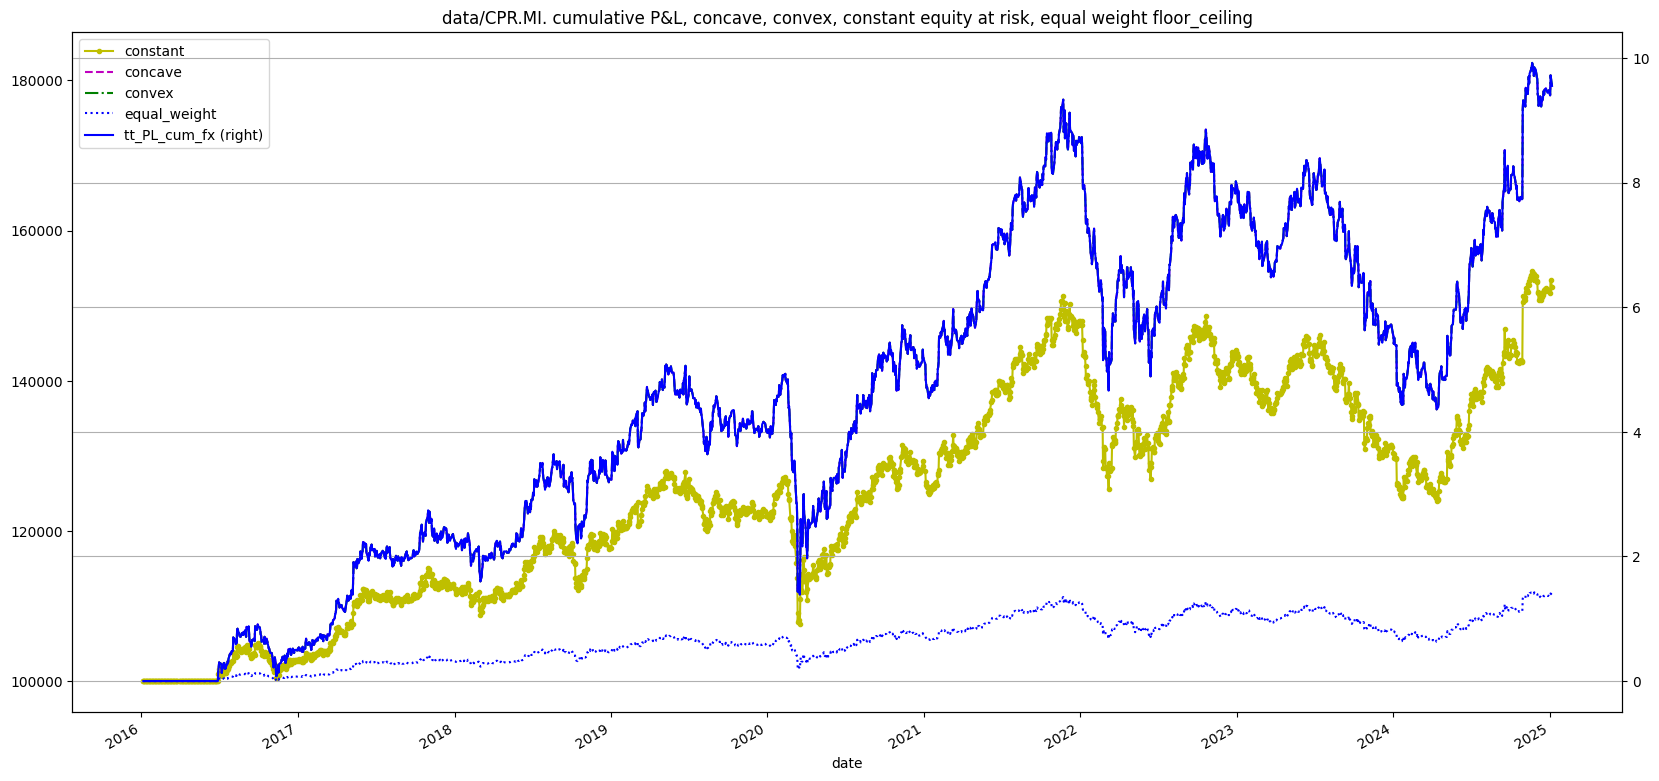

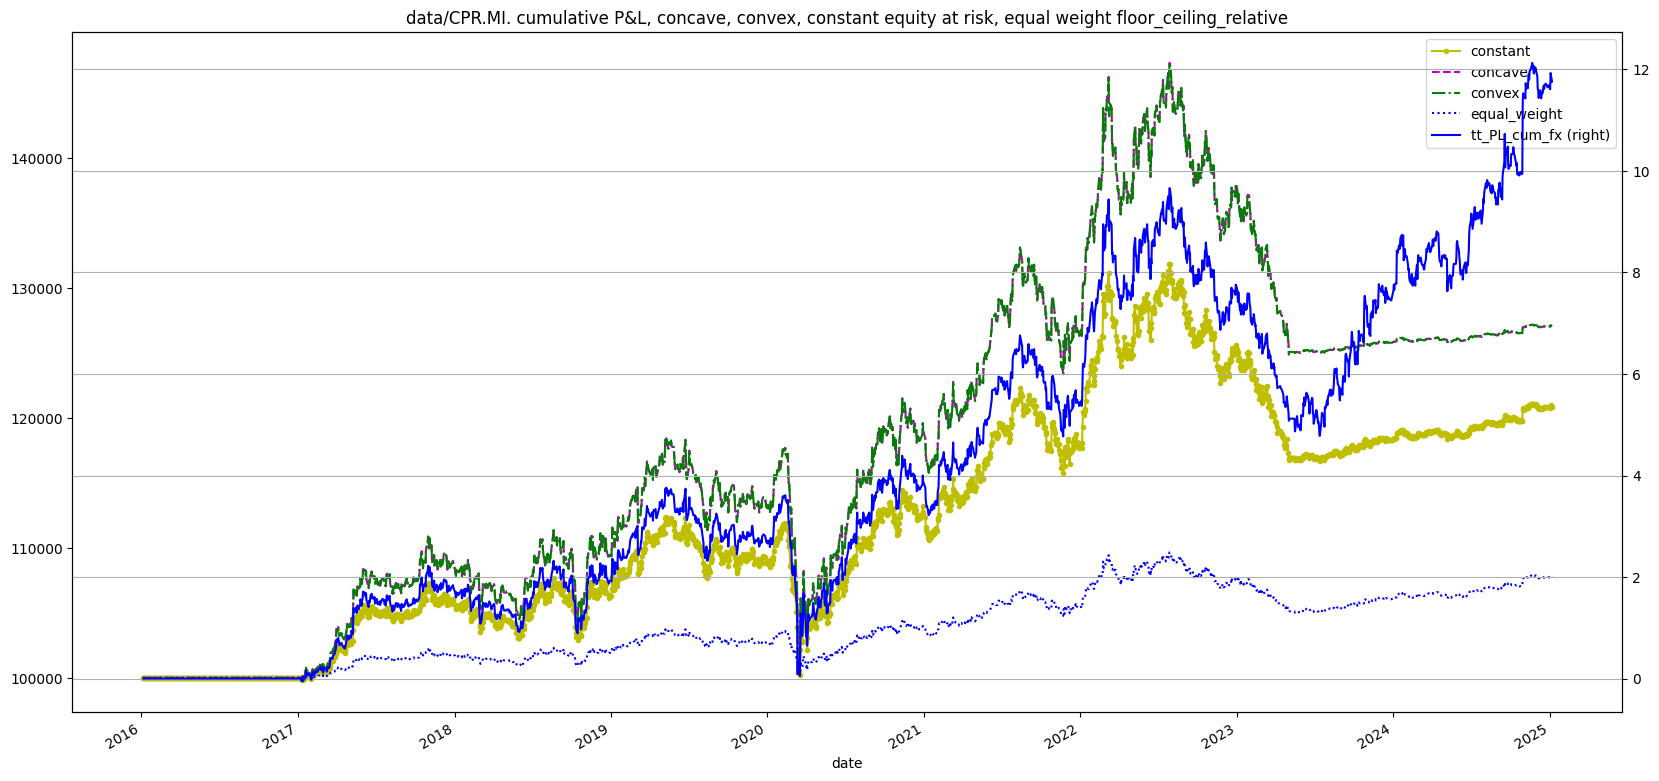

In [25]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [26]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

shs_eql  shs_fxd  shs_ccv  shs_cvx
method                                                    
breakout                 -800.0    800.0   1300.0   1300.0
ema                      -800.0    800.0   1300.0   1300.0
floor_ceiling            -900.0   5500.0   8300.0   8300.0
floor_ceiling_relative   -900.0    600.0    300.0    300.0
sma                      -800.0    800.0   1300.0   1300.0
turtle                   -800.0   -400.0   -600.0   -400.0

In [27]:
df_fc.columns

Index(['date', 'volume', 'high', 'low', 'open', 'close', 'adj_close', 'ticker',
       'ropen', 'rhigh', 'rlow', 'rclose', 'hi1', 'lo1', 'hi2', 'lo2', 'hi3',
       'lo3', 'hi4', 'lo4', 'rt', 'rg', 'flr', 'clg', 'rg_ch', 'rh1', 'rl1',
       'rh2', 'rl2', 'rh3', 'rl3', 'rh4', 'rl4', 'rrt', 'rrg', 'rflr', 'rclg',
       'rrg_ch'],
      dtype='object')

In [28]:
df_fc[df_fc['clg'].notna()][['date', 'clg']].tail(1)

date    clg
1497 2021-11-22 08:00:00  13.48

In [29]:

df_fc[df_fc['flr'].notna()][['date', 'flr']].tail(1)

date   flr
29 2016-02-12 08:00:00  3.44

In [30]:

df_fc[df_fc['hi3'].notna()][['date', 'hi3']].tail(1)

date   hi3
2239 2024-10-18 07:00:00  7.92

In [31]:
df_fc[df_fc['lo3'].notna()][['date', 'lo3']].tail(1)

date   lo3
2264 2024-11-22 08:00:00  5.55

In [32]:

price = 2.021
stop_loss = 1.61
qty = 1000
r_multiplier = 1.1
r_multiplier
pt = target_price(price, stop_loss, r_multiplier)
exit_qty = partial_exit(qty, r_multiplier)
print('target price', pt,'exit_quantity',exit_qty)

target price 2.4730999999999996 exit_quantity 909.090909090909


In [33]:
cost = 1.8945
price = cost * 1.08
qty * (cost - stop_loss) / (price - stop_loss)

652.4331514011832

In [34]:
average_true_range(df_fc,'high','low','close', n= 63)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2286    0.177302
2287    0.176825
2288    0.176825
2289    0.176984
2290    0.179048
Length: 2291, dtype: float64

In [35]:
df_fc.tail()

date   volume  high   low  open  close  adj_close  ticker  \
2286 2024-12-27 08:00:00  2606751  6.06  5.97  6.03   6.06       6.06  CPR.MI   
2287 2024-12-30 08:00:00  3331743  6.12  6.00  6.04   6.02       6.02  CPR.MI   
2288 2025-01-02 08:00:00  3603650  6.12  5.96  6.07   6.10       6.10  CPR.MI   
2289 2025-01-03 08:00:00  9887749  6.12  5.78  6.12   5.78       5.78  CPR.MI   
2290 2025-01-06 16:39:11  9206005  5.97  5.71  5.74   5.95       5.95  CPR.MI   

      ropen  rhigh  ...  rl2  rh3  rl3  rh4  rl4  rrt  rrg  rflr  rclg  rrg_ch  
2286   3.66   3.68  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    6.24  
2287   3.67   3.71  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    6.24  
2288   3.66   3.69  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    6.24  
2289   3.72   3.72  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    6.24  
2290   3.49   3.63  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    6.24  

[5 rows x 38 columns]

In [36]:
df_fc['peak_eqty'] =df_fc['close'].cummax()